In [1]:
suppressPackageStartupMessages({
library(Seurat)
library(dplyr)
library(tibble)
library(org.Mm.eg.db)
library(EnsDb.Mmusculus.v79)
library(TxDb.Mmusculus.UCSC.mm10.ensGene)
library(loomR)
library(reshape2)
library(ggplot2)
library(patchwork)
library(data.table)
library(eulerr)
library(ggpubr)
library(viridis)
options(stringsAsFactors = FALSE)
})

In [2]:
select <- dplyr::select
filter <- dplyr::filter
rename <- dplyr::rename

In [3]:
make_pdf <- function(object, filename, w, h){
    out_name <- paste0(format(Sys.Date(), "%y%m%d"),"_",filename,".pdf")
    pdf(out_name, width=w, height=h)
        plot(object)
    dev.off()
}

In [4]:
setwd("/staging/leuven/stg_00041/Ryan/RA004_XHetDel/deep_seq/data/Ryan_Allsop/zUMI_out/")

In [5]:
# Define colors
myPalette <- list("#77270d", "#ee8866", "#d6c941", "#eedd88", "#aaaa00", "#4ed641", "#44bb99", "#41d6c9", "#414ed6", "#77aadd", "#AC8CC1","#ffaabb")
names(myPalette) <- c("bold_red", "red", "bold_yellow", "yellow", "bold_green", "green", "bold_cyan", "cyan", "bold_blue", "blue", "bold_magenta", "magenta")

# XX            # 4ed641 # green
# XCastOMus     # 77A9DB # blue
# XMusOCast     # EE8766 # red
# XMusY         # EEDD88 # yellow
# Deletion 1    # F6A8BA # magenta
# Deletion 2    # 44BC99 # bold_cyan
# Deletion 3    # AC8CC1 # bold_magenta

In [6]:
gene_metadata <- left_join(
                 AnnotationDbi::select(EnsDb.Mmusculus.v79,
                   keys=keys(EnsDb.Mmusculus.v79, keytype="GENEID"),
                   columns=c("SYMBOL","GENESEQSTART", "GENESEQEND"),
                   keytype="GENEID"),
                AnnotationDbi::select(TxDb.Mmusculus.UCSC.mm10.ensGene,
                   keys=keys(TxDb.Mmusculus.UCSC.mm10.ensGene, keytype="GENEID"), 
                   column="CDSCHROM",
                   keytype="GENEID"),
                by="GENEID"
            )

all_wells <- read.table("../metadata/well_barcodes_cell_types")
colnames(all_wells) <- c("Well", "SampleID", "Cell_line")
all_wells <- all_wells %>% mutate(Well_cell_line = paste0(Well, "_", Cell_line))

'select()' returned 1:1 mapping between keys and columns



In [7]:
escapees <- c("1810030O07Rik","2010000l03Rik","2010308F09Rik","2610029G23Rik","5530601H04Rik","6720401G13Rik","Abcd1","Araf","Atp6ap2","BC022960","Bgn","Car5b","D330035K16Rik","D930009K15Rik","Ddx3x","Eif1ax","Eif2s3x","Fam50a","Flna","Ftsj1","Fundc1","Gdi1","Gemin8","Gpkow","Huwe1","Idh3g","Igbp1","Ikbkg","Kdm5c","Kdm6a","Lamp2","Maged1","Mbtps2","Med14","Mid1","Mmgt1","Mpp1","Msl3","Ndufb11","Nkap","Ogt","Pbdc1","Pdha1","Prdx4","Rbm3","Renbp","Sh3bgrl","Shroom4","Sms","Suv39h1","Syap1","Tbc1d25","Timp1","Trap1a","Uba1","Usp9x","Utp14a","Uxt","Xist","Yipf6")

In [8]:
gene_metadata <- gene_metadata %>%
    mutate(escapee=case_when(SYMBOL %in% escapees ~ TRUE,
                              TRUE ~ FALSE))

In [9]:
# Protein IDs were converted to ENSEMBL gene IDs with BioMart https://nov2020.archive.ensembl.org/biomart/martview/
complex_forming_genes <- c("ENSMUSG00000070390","ENSMUSG00000031095","ENSMUSG00000035576","ENSMUSG00000020758","ENSMUSG00000064127","ENSMUSG00000079487","ENSMUSG00000057378","ENSMUSG00000040720","ENSMUSG00000072980","ENSMUSG00000026768","ENSMUSG00000051747","ENSMUSG00000068394","ENSMUSG00000059995","ENSMUSG00000007880","ENSMUSG00000039219","ENSMUSG00000010453","ENSMUSG00000033769","ENSMUSG00000041445","ENSMUSG00000020916","ENSMUSG00000024897","ENSMUSG00000038102","ENSMUSG00000069272","ENSMUSG00000071478","ENSMUSG00000069270","ENSMUSG00000071516","ENSMUSG00000061615","ENSMUSG00000069309","ENSMUSG00000094248","ENSMUSG00000094777","ENSMUSG00000069301","ENSMUSG00000038770","ENSMUSG00000021057","ENSMUSG00000028001","ENSMUSG00000024169","ENSMUSG00000030592","ENSMUSG00000071226","ENSMUSG00000021313","ENSMUSG00000022000","ENSMUSG00000033237","ENSMUSG00000074818","ENSMUSG00000006005","ENSMUSG00000048118","ENSMUSG00000054051","ENSMUSG00000070808","ENSMUSG00000026509","ENSMUSG00000024381","ENSMUSG00000013663","ENSMUSG00000030814","ENSMUSG00000063727","ENSMUSG00000057789","ENSMUSG00000022324","ENSMUSG00000029238","ENSMUSG00000032855","ENSMUSG00000028249","ENSMUSG00000028800","ENSMUSG00000031059","ENSMUSG00000020668","ENSMUSG00000004264","ENSMUSG00000031921","ENSMUSG00000028339","ENSMUSG00000029177","ENSMUSG00000034462","ENSMUSG00000020792","ENSMUSG00000027782","ENSMUSG00000021929","ENSMUSG00000003731","ENSMUSG00000024942","ENSMUSG00000029763","ENSMUSG00000028926","ENSMUSG00000029469","ENSMUSG00000009090","ENSMUSG00000020471","ENSMUSG00000045948","ENSMUSG00000016427","ENSMUSG00000020583","ENSMUSG00000090071","ENSMUSG00000050675","ENSMUSG00000059363","ENSMUSG00000037772","ENSMUSG00000020893","ENSMUSG00000030165","ENSMUSG00000028757","ENSMUSG00000020198","ENSMUSG00000039231","ENSMUSG00000020689","ENSMUSG00000022809","ENSMUSG00000027381","ENSMUSG00000037935","ENSMUSG00000067713","ENSMUSG00000020974","ENSMUSG00000028847","ENSMUSG00000090247","ENSMUSG00000060636","ENSMUSG00000020897","ENSMUSG00000002814","ENSMUSG00000017716","ENSMUSG00000016758","ENSMUSG00000028957","ENSMUSG00000021611","ENSMUSG00000031819","ENSMUSG00000026196","ENSMUSG00000007877","ENSMUSG00000020722","ENSMUSG00000031012","ENSMUSG00000030054","ENSMUSG00000026837","ENSMUSG00000035021","ENSMUSG00000013415","ENSMUSG00000027012","ENSMUSG00000004221","ENSMUSG00000024947","ENSMUSG00000106695","ENSMUSG00000000142","ENSMUSG00000031609","ENSMUSG00000035086","ENSMUSG00000091512","ENSMUSG00000031660","ENSMUSG00000030528","ENSMUSG00000020331","ENSMUSG00000021730","ENSMUSG00000028051","ENSMUSG00000026761","ENSMUSG00000045867","ENSMUSG00000019979","ENSMUSG00000003872","ENSMUSG00000027162","ENSMUSG00000026029","ENSMUSG00000064370","ENSMUSG00000021250","ENSMUSG00000022346","ENSMUSG00000053977","ENSMUSG00000031502","ENSMUSG00000002900","ENSMUSG00000064341","ENSMUSG00000064345","ENSMUSG00000064360","ENSMUSG00000065947","ENSMUSG00000064363","ENSMUSG00000064367","ENSMUSG00000064368","ENSMUSG00000046834","ENSMUSG00000052217","ENSMUSG00000024620","ENSMUSG00000052684","ENSMUSG00000023043","ENSMUSG00000055609","ENSMUSG00000021822","ENSMUSG00000019982","ENSMUSG00000032231","ENSMUSG00000030978","ENSMUSG00000021270","ENSMUSG00000003549","ENSMUSG00000026043","ENSMUSG00000031503","ENSMUSG00000041959","ENSMUSG00000022982","ENSMUSG00000025809","ENSMUSG00000025371","ENSMUSG00000037894","ENSMUSG00000024109","ENSMUSG00000113902","ENSMUSG00000053044","ENSMUSG00000057329","ENSMUSG00000005397","ENSMUSG00000021939","ENSMUSG00000022884","ENSMUSG00000069268","ENSMUSG00000094338","ENSMUSG00000095217","ENSMUSG00000069307","ENSMUSG00000069303","ENSMUSG00000069300","ENSMUSG00000001506","ENSMUSG00000020649","ENSMUSG00000031538","ENSMUSG00000037992","ENSMUSG00000019942","ENSMUSG00000023944","ENSMUSG00000049382","ENSMUSG00000001128","ENSMUSG00000000555","ENSMUSG00000020277","ENSMUSG00000062647","ENSMUSG00000022105","ENSMUSG00000026576","ENSMUSG00000036905","ENSMUSG00000046364","ENSMUSG00000037563","ENSMUSG00000043716","ENSMUSG00000032518","ENSMUSG00000067274","ENSMUSG00000071076","ENSMUSG00000110974","ENSMUSG00000068220","ENSMUSG00000020428","ENSMUSG00000060279","ENSMUSG00000002957","ENSMUSG00000028645","ENSMUSG00000027342","ENSMUSG00000027931","ENSMUSG00000020592","ENSMUSG00000091898","ENSMUSG00000032796","ENSMUSG00000074129","ENSMUSG00000021665","ENSMUSG00000025395","ENSMUSG00000015290","ENSMUSG00000020436","ENSMUSG00000031731","ENSMUSG00000029054","ENSMUSG00000039639","ENSMUSG00000023994","ENSMUSG00000115906","ENSMUSG00000030830","ENSMUSG00000027187","ENSMUSG00000041431","ENSMUSG00000041859","ENSMUSG00000056174","ENSMUSG00000070348","ENSMUSG00000044533","ENSMUSG00000001281","ENSMUSG00000000560","ENSMUSG00000031343","ENSMUSG00000030435","ENSMUSG00000029231","ENSMUSG00000056054","ENSMUSG00000026187","ENSMUSG00000060036","ENSMUSG00000027248","ENSMUSG00000027985","ENSMUSG00000056501","ENSMUSG00000022483","ENSMUSG00000059436","ENSMUSG00000015846","ENSMUSG00000039656","ENSMUSG00000018395","ENSMUSG00000014767","ENSMUSG00000022283","ENSMUSG00000025232","ENSMUSG00000025888","ENSMUSG00000020826","ENSMUSG00000029863","ENSMUSG00000017344","ENSMUSG00000032218","ENSMUSG00000000184","ENSMUSG00000034165","ENSMUSG00000006728","ENSMUSG00000056071","ENSMUSG00000006678","ENSMUSG00000026134","ENSMUSG00000024833","ENSMUSG00000059003","ENSMUSG00000026959","ENSMUSG00000046223","ENSMUSG00000031299","ENSMUSG00000041695","ENSMUSG00000003033","ENSMUSG00000025408","ENSMUSG00000032193","ENSMUSG00000038900","ENSMUSG00000059070","ENSMUSG00000021779","ENSMUSG00000001435","ENSMUSG00000030432","ENSMUSG00000015579","ENSMUSG00000024151","ENSMUSG00000027087","ENSMUSG00000022391","ENSMUSG00000009907","ENSMUSG00000031201","ENSMUSG00000053110","ENSMUSG00000032116","ENSMUSG00000032553","ENSMUSG00000025407","ENSMUSG00000033065","ENSMUSG00000029614","ENSMUSG00000048758","ENSMUSG00000007892","ENSMUSG00000058558","ENSMUSG00000000740","ENSMUSG00000022479","ENSMUSG00000070880","ENSMUSG00000026787","ENSMUSG00000021816","ENSMUSG00000022092","ENSMUSG00000032034","ENSMUSG00000017146","ENSMUSG00000035458","ENSMUSG00000029253","ENSMUSG00000028969","ENSMUSG00000022673","ENSMUSG00000005410","ENSMUSG00000026414","ENSMUSG00000031449","ENSMUSG00000047215","ENSMUSG00000092074","ENSMUSG00000096255","ENSMUSG00000000579","ENSMUSG00000095677","ENSMUSG00000040613","ENSMUSG00000040533","ENSMUSG00000027715","ENSMUSG00000021103","ENSMUSG00000066878","ENSMUSG00000018362","ENSMUSG00000038644","ENSMUSG00000021606","ENSMUSG00000034957","ENSMUSG00000038975","ENSMUSG00000005370","ENSMUSG00000050761","ENSMUSG00000034362","ENSMUSG00000018983","ENSMUSG00000017264","ENSMUSG00000003458","ENSMUSG00000054312","ENSMUSG00000039680","ENSMUSG00000021221","ENSMUSG00000036678","ENSMUSG00000040034","ENSMUSG00000116037","ENSMUSG00000014418","ENSMUSG00000042548","ENSMUSG00000030079","ENSMUSG00000039703","ENSMUSG00000029580","ENSMUSG00000062270","ENSMUSG00000059796","ENSMUSG00000028234","ENSMUSG00000038583","ENSMUSG00000074781","ENSMUSG00000036372","ENSMUSG00000048100","ENSMUSG00000060938","ENSMUSG00000028609","ENSMUSG00000063316","ENSMUSG00000046330","ENSMUSG00000022174","ENSMUSG00000048895","ENSMUSG00000026917","ENSMUSG00000004849","ENSMUSG00000061477","ENSMUSG00000047675","ENSMUSG00000008683","ENSMUSG00000024608","ENSMUSG00000049517","ENSMUSG00000008668","ENSMUSG00000034892","ENSMUSG00000003429","ENSMUSG00000090862","ENSMUSG00000047459","ENSMUSG00000031320","ENSMUSG00000045128","ENSMUSG00000008036","ENSMUSG00000058546","ENSMUSG00000028495","ENSMUSG00000091405","ENSMUSG00000060981","ENSMUSG00000069274","ENSMUSG00000061482","ENSMUSG00000060678","ENSMUSG00000067455","ENSMUSG00000064288","ENSMUSG00000069266","ENSMUSG00000060093","ENSMUSG00000069306","ENSMUSG00000069305","ENSMUSG00000060639","ENSMUSG00000096010","ENSMUSG00000010803","ENSMUSG00000071415","ENSMUSG00000063457","ENSMUSG00000025290","ENSMUSG00000009927","ENSMUSG00000025362","ENSMUSG00000067288","ENSMUSG00000022400","ENSMUSG00000058600","ENSMUSG00000079641","ENSMUSG00000063694","ENSMUSG00000058927","ENSMUSG00000073702","ENSMUSG00000030744","ENSMUSG00000057841","ENSMUSG00000003970","ENSMUSG00000093674","ENSMUSG00000028639","ENSMUSG00000020460","ENSMUSG00000068240","ENSMUSG00000090137","ENSMUSG00000015656","ENSMUSG00000028156","ENSMUSG00000033676","ENSMUSG00000022285","ENSMUSG00000007653","ENSMUSG00000020248","ENSMUSG00000009013","ENSMUSG00000026824","ENSMUSG00000061787","ENSMUSG00000015120","ENSMUSG00000052146","ENSMUSG00000028161","ENSMUSG00000038845","ENSMUSG00000099517","ENSMUSG00000101355","ENSMUSG00000069265","ENSMUSG00000101972","ENSMUSG00000001440","ENSMUSG00000026585","ENSMUSG00000025271","ENSMUSG00000067199","ENSMUSG00000031681","ENSMUSG00000089682","ENSMUSG00000032897","ENSMUSG00000005262","ENSMUSG00000020647","ENSMUSG00000025925","ENSMUSG00000002010","ENSMUSG00000004446","ENSMUSG00000023027","ENSMUSG00000049751","ENSMUSG00000079435","ENSMUSG00000022841","ENSMUSG00000017404","ENSMUSG00000081058","ENSMUSG00000093769","ENSMUSG00000074403","ENSMUSG00000100210","ENSMUSG00000069273","ENSMUSG00000099583","ENSMUSG00000069310","ENSMUSG00000069267","ENSMUSG00000060499","ENSMUSG00000038612","ENSMUSG00000002870","ENSMUSG00000026355","ENSMUSG00000022672","ENSMUSG00000028081","ENSMUSG00000025358","ENSMUSG00000009545","ENSMUSG00000004642","ENSMUSG00000030697","ENSMUSG00000024515","ENSMUSG00000023051","ENSMUSG00000030652","ENSMUSG00000032481","ENSMUSG00000020038","ENSMUSG00000067614","ENSMUSG00000019846","ENSMUSG00000041147","ENSMUSG00000036887","ENSMUSG00000025508","ENSMUSG00000063882","ENSMUSG00000023951","ENSMUSG00000068196","ENSMUSG00000021264","ENSMUSG00000020734","ENSMUSG00000025958","ENSMUSG00000029661","ENSMUSG00000051331","ENSMUSG00000028452","ENSMUSG00000036896","ENSMUSG00000006932","ENSMUSG00000020241","ENSMUSG00000069089","ENSMUSG00000023885","ENSMUSG00000002771","ENSMUSG00000059412","ENSMUSG00000001119","ENSMUSG00000039462","ENSMUSG00000028047","ENSMUSG00000060798","ENSMUSG00000116357","ENSMUSG00000042406","ENSMUSG00000025064","ENSMUSG00000003873","ENSMUSG00000027323","ENSMUSG00000038482","ENSMUSG00000027067","ENSMUSG00000116526","ENSMUSG00000034848","ENSMUSG00000025321","ENSMUSG00000037185","ENSMUSG00000026141","ENSMUSG00000048402","ENSMUSG00000034292","ENSMUSG00000003119","ENSMUSG00000063884","ENSMUSG00000069830","ENSMUSG00000057177","ENSMUSG00000026609","ENSMUSG00000068794","ENSMUSG00000040187","ENSMUSG00000028863","ENSMUSG00000028197","ENSMUSG00000024687","ENSMUSG00000049562","ENSMUSG00000008140","ENSMUSG00000024349","ENSMUSG00000001445","ENSMUSG00000031446","ENSMUSG00000002658","ENSMUSG00000041126","ENSMUSG00000021711","ENSMUSG00000036672","ENSMUSG00000032187","ENSMUSG00000061244","ENSMUSG00000041215","ENSMUSG00000038544","ENSMUSG00000047921","ENSMUSG00000006335","ENSMUSG00000024740","ENSMUSG00000012076","ENSMUSG00000026708","ENSMUSG00000039623","ENSMUSG00000026042","ENSMUSG00000005233","ENSMUSG00000020743","ENSMUSG00000042015","ENSMUSG00000041471","ENSMUSG00000073471","ENSMUSG00000037890","ENSMUSG00000031820","ENSMUSG00000028114","ENSMUSG00000071014","ENSMUSG00000049323","ENSMUSG00000034560","ENSMUSG00000033862","ENSMUSG00000037991","ENSMUSG00000057649","ENSMUSG00000047146","ENSMUSG00000075266","ENSMUSG00000025645","ENSMUSG00000011658","ENSMUSG00000028330","ENSMUSG00000070369","ENSMUSG00000006464","ENSMUSG00000042284","ENSMUSG00000027829","ENSMUSG00000064128","ENSMUSG00000073436","ENSMUSG00000042506","ENSMUSG00000038000","ENSMUSG00000050697","ENSMUSG00000025782","ENSMUSG00000022191","ENSMUSG00000049299","ENSMUSG00000044795","ENSMUSG00000045672","ENSMUSG00000020519","ENSMUSG00000020898","ENSMUSG00000038909","ENSMUSG00000034297","ENSMUSG00000034329","ENSMUSG00000057667","ENSMUSG00000052595","ENSMUSG00000042557","ENSMUSG00000027544","ENSMUSG00000060601","ENSMUSG00000000568","ENSMUSG00000019899","ENSMUSG00000005947","ENSMUSG00000023964","ENSMUSG00000042453","ENSMUSG00000032332","ENSMUSG00000021408","ENSMUSG00000026037","ENSMUSG00000022905","ENSMUSG00000057236","ENSMUSG00000031353","ENSMUSG00000015647","ENSMUSG00000001105","ENSMUSG00000005886","ENSMUSG00000026641","ENSMUSG00000019471","ENSMUSG00000026639","ENSMUSG00000024826","ENSMUSG00000031077","ENSMUSG00000031386","ENSMUSG00000031928","ENSMUSG00000015994","ENSMUSG00000027966","ENSMUSG00000052911","ENSMUSG00000024959","ENSMUSG00000025499","ENSMUSG00000027793","ENSMUSG00000002068","ENSMUSG00000021548","ENSMUSG00000023018","ENSMUSG00000027490","ENSMUSG00000021318","ENSMUSG00000031533","ENSMUSG00000027111","ENSMUSG00000096146","ENSMUSG00000027475","ENSMUSG00000045545","ENSMUSG00000029730","ENSMUSG00000031622","ENSMUSG00000024241","ENSMUSG00000015776","ENSMUSG00000037013","ENSMUSG00000036980","ENSMUSG00000032440","ENSMUSG00000026374","ENSMUSG00000024563","ENSMUSG00000028252","ENSMUSG00000015533","ENSMUSG00000001507","ENSMUSG00000008958","ENSMUSG00000017858","ENSMUSG00000033953","ENSMUSG00000028310","ENSMUSG00000109511","ENSMUSG00000025650","ENSMUSG00000024949","ENSMUSG00000106722","ENSMUSG00000040274","ENSMUSG00000025758","ENSMUSG00000116326","ENSMUSG00000058239","ENSMUSG00000007613","ENSMUSG00000024330","ENSMUSG00000027326","ENSMUSG00000040865","ENSMUSG00000041297","ENSMUSG00000066415","ENSMUSG00000023932","ENSMUSG00000042029","ENSMUSG00000025648","ENSMUSG00000037315","ENSMUSG00000039068","ENSMUSG00000034152","ENSMUSG00000047767","ENSMUSG00000030323","ENSMUSG00000045983","ENSMUSG00000039738","ENSMUSG00000041846","ENSMUSG00000059474","ENSMUSG00000028949","ENSMUSG00000038205","ENSMUSG00000002428","ENSMUSG00000025369","ENSMUSG00000035770","ENSMUSG00000052915","ENSMUSG00000063870","ENSMUSG00000028294","ENSMUSG00000022292","ENSMUSG00000033628","ENSMUSG00000031099","ENSMUSG00000074030","ENSMUSG00000024104","ENSMUSG00000042185","ENSMUSG00000050310","ENSMUSG00000000600","ENSMUSG00000038564","ENSMUSG00000025764","ENSMUSG00000034154","ENSMUSG00000032555","ENSMUSG00000020387","ENSMUSG00000052533","ENSMUSG00000048578","ENSMUSG00000006333","ENSMUSG00000058443","ENSMUSG00000008682","ENSMUSG00000062997","ENSMUSG00000078193","ENSMUSG00000041084","ENSMUSG00000002043","ENSMUSG00000020022","ENSMUSG00000032423","ENSMUSG00000045248","ENSMUSG00000054702","ENSMUSG00000021377","ENSMUSG00000027933","ENSMUSG00000040463","ENSMUSG00000028322","ENSMUSG00000027751","ENSMUSG00000039809","ENSMUSG00000018412","ENSMUSG00000001855","ENSMUSG00000027959","ENSMUSG00000031314","ENSMUSG00000001998","ENSMUSG00000066621","ENSMUSG00000039137","ENSMUSG00000055334","ENSMUSG00000044254","ENSMUSG00000047534","ENSMUSG00000022371","ENSMUSG00000046756","ENSMUSG00000055553","ENSMUSG00000030708","ENSMUSG00000021559","ENSMUSG00000041238","ENSMUSG00000028364","ENSMUSG00000026725","ENSMUSG00000033543","ENSMUSG00000037740","ENSMUSG00000021932","ENSMUSG00000035919","ENSMUSG00000036106","ENSMUSG00000026798","ENSMUSG00000006542","ENSMUSG00000024286","ENSMUSG00000026107","ENSMUSG00000029656","ENSMUSG00000052798","ENSMUSG00000047989","ENSMUSG00000055078","ENSMUSG00000028873","ENSMUSG00000024260","ENSMUSG00000036291","ENSMUSG00000032939","ENSMUSG00000004843","ENSMUSG00000039055","ENSMUSG00000024038","ENSMUSG00000024576","ENSMUSG00000041632","ENSMUSG00000028576","ENSMUSG00000038696","ENSMUSG00000038116","ENSMUSG00000040690","ENSMUSG00000074811","ENSMUSG00000025646","ENSMUSG00000028247","ENSMUSG00000066643","ENSMUSG00000098274","ENSMUSG00000035234","ENSMUSG00000022992","ENSMUSG00000066900","ENSMUSG00000021767","ENSMUSG00000028518","ENSMUSG00000056832","ENSMUSG00000008690","ENSMUSG00000042323","ENSMUSG00000063801","ENSMUSG00000031328","ENSMUSG00000034826","ENSMUSG00000109941","ENSMUSG00000020514","ENSMUSG00000032402","ENSMUSG00000024477","ENSMUSG00000015750","ENSMUSG00000038481","ENSMUSG00000024360","ENSMUSG00000032965","ENSMUSG00000015829","ENSMUSG00000039552","ENSMUSG00000020783","ENSMUSG00000030330","ENSMUSG00000069495","ENSMUSG00000026289","ENSMUSG00000032396","ENSMUSG00000021209","ENSMUSG00000034906","ENSMUSG00000027080","ENSMUSG00000025235","ENSMUSG00000021965","ENSMUSG00000022350","ENSMUSG00000020319","ENSMUSG00000031629","ENSMUSG00000025144","ENSMUSG00000027509","ENSMUSG00000032375","ENSMUSG00000078517","ENSMUSG00000039985","ENSMUSG00000024240","ENSMUSG00000057914","ENSMUSG00000037526","ENSMUSG00000046192","ENSMUSG00000040866","ENSMUSG00000040667","ENSMUSG00000050552","ENSMUSG00000034349","ENSMUSG00000028312","ENSMUSG00000034160","ENSMUSG00000036568","ENSMUSG00000029505","ENSMUSG00000024926","ENSMUSG00000018651","ENSMUSG00000036180","ENSMUSG00000028019","ENSMUSG00000027425","ENSMUSG00000026491","ENSMUSG00000036698","ENSMUSG00000019906","ENSMUSG00000020652","ENSMUSG00000047604","ENSMUSG00000027778","ENSMUSG00000033831","ENSMUSG00000043866","ENSMUSG00000035031","ENSMUSG00000031262","ENSMUSG00000031782","ENSMUSG00000046573","ENSMUSG00000035354","ENSMUSG00000061273","ENSMUSG00000021577","ENSMUSG00000037325","ENSMUSG00000033373","ENSMUSG00000020628","ENSMUSG00000020775","ENSMUSG00000042694","ENSMUSG00000037531","ENSMUSG00000000378","ENSMUSG00000059734","ENSMUSG00000052139","ENSMUSG00000078676","ENSMUSG00000053293","ENSMUSG00000024053","ENSMUSG00000021144","ENSMUSG00000063564","ENSMUSG00000049489","ENSMUSG00000038982","ENSMUSG00000018858","ENSMUSG00000062203","ENSMUSG00000067995","ENSMUSG00000039509","ENSMUSG00000048930","ENSMUSG00000059534","ENSMUSG00000021235","ENSMUSG00000034190","ENSMUSG00000003680","ENSMUSG00000016833","ENSMUSG00000031539","ENSMUSG00000015971","ENSMUSG00000079614","ENSMUSG00000025374","ENSMUSG00000019715","ENSMUSG00000033970","ENSMUSG00000059518","ENSMUSG00000114797","ENSMUSG00000063895","ENSMUSG00000003778","ENSMUSG00000029635","ENSMUSG00000014232","ENSMUSG00000036435","ENSMUSG00000020882","ENSMUSG00000020739","ENSMUSG00000032691","ENSMUSG00000021738","ENSMUSG00000026999","ENSMUSG00000039356","ENSMUSG00000028614","ENSMUSG00000002968","ENSMUSG00000031935","ENSMUSG00000015083","ENSMUSG00000033860","ENSMUSG00000061650","ENSMUSG00000035831","ENSMUSG00000032571","ENSMUSG00000021013","ENSMUSG00000024101","ENSMUSG00000033161","ENSMUSG00000044018","ENSMUSG00000023723","ENSMUSG00000098375","ENSMUSG00000025451","ENSMUSG00000028899","ENSMUSG00000027835","ENSMUSG00000060708","ENSMUSG00000031913","ENSMUSG00000039630","ENSMUSG00000111145","ENSMUSG00000029670","ENSMUSG00000069170","ENSMUSG00000042390","ENSMUSG00000052293","ENSMUSG00000078941","ENSMUSG00000024033","ENSMUSG00000027615","ENSMUSG00000025580","ENSMUSG00000025968","ENSMUSG00000004415","ENSMUSG00000037860","ENSMUSG00000033430","ENSMUSG00000068823","ENSMUSG00000029676","ENSMUSG00000013593","ENSMUSG00000028944","ENSMUSG00000038697","ENSMUSG00000029265","ENSMUSG00000057531","ENSMUSG00000037798","ENSMUSG00000027244","ENSMUSG00000030062","ENSMUSG00000037916","ENSMUSG00000024906","ENSMUSG00000031715","ENSMUSG00000015804","ENSMUSG00000002679","ENSMUSG00000034259","ENSMUSG00000029681","ENSMUSG00000033732","ENSMUSG00000028622","ENSMUSG00000000743","ENSMUSG00000020463","ENSMUSG00000061527","ENSMUSG00000027998","ENSMUSG00000078348","ENSMUSG00000020063","ENSMUSG00000016356","ENSMUSG00000012114","ENSMUSG00000055817","ENSMUSG00000035772","ENSMUSG00000032006","ENSMUSG00000018160","ENSMUSG00000020358","ENSMUSG00000000561","ENSMUSG00000022881","ENSMUSG00000002109","ENSMUSG00000038160","ENSMUSG00000009555","ENSMUSG00000021278","ENSMUSG00000078619","ENSMUSG00000024218","ENSMUSG00000063887","ENSMUSG00000029163","ENSMUSG00000017210","ENSMUSG00000042328","ENSMUSG00000030286","ENSMUSG00000024735","ENSMUSG00000037570","ENSMUSG00000026260","ENSMUSG00000032314","ENSMUSG00000026563","ENSMUSG00000021028","ENSMUSG00000109901","ENSMUSG00000038803","ENSMUSG00000028648","ENSMUSG00000031546","ENSMUSG00000049548","ENSMUSG00000035984","ENSMUSG00000002083","ENSMUSG00000029712","ENSMUSG00000080268","ENSMUSG00000024436","ENSMUSG00000027374","ENSMUSG00000021607","ENSMUSG00000034880","ENSMUSG00000024414","ENSMUSG00000024683","ENSMUSG00000028140","ENSMUSG00000032563","ENSMUSG00000029486","ENSMUSG00000026683","ENSMUSG00000022142","ENSMUSG00000020962","ENSMUSG00000030034","ENSMUSG00000021901","ENSMUSG00000023089","ENSMUSG00000023919","ENSMUSG00000033845","ENSMUSG00000002416","ENSMUSG00000062981","ENSMUSG00000028066","ENSMUSG00000079677","ENSMUSG00000034932","ENSMUSG00000049960","ENSMUSG00000020163","ENSMUSG00000030335","ENSMUSG00000019710","ENSMUSG00000053119","ENSMUSG00000024925","ENSMUSG00000030842","ENSMUSG00000030042","ENSMUSG00000030291","ENSMUSG00000007338","ENSMUSG00000022774","ENSMUSG00000030647","ENSMUSG00000044894","ENSMUSG00000014294","ENSMUSG00000028549","ENSMUSG00000115904","ENSMUSG00000035674","ENSMUSG00000068101","ENSMUSG00000040236","ENSMUSG00000009863","ENSMUSG00000022109","ENSMUSG00000063787","ENSMUSG00000022820","ENSMUSG00000031242","ENSMUSG00000034211","ENSMUSG00000024902","ENSMUSG00000021967","ENSMUSG00000027673","ENSMUSG00000038622","ENSMUSG00000022354","ENSMUSG00000029066","ENSMUSG00000057388","ENSMUSG00000052962","ENSMUSG00000036850","ENSMUSG00000106918","ENSMUSG00000079317","ENSMUSG00000039001","ENSMUSG00000036835","ENSMUSG00000027133","ENSMUSG00000019923","ENSMUSG00000020477","ENSMUSG00000047260","ENSMUSG00000043501","ENSMUSG00000032905","ENSMUSG00000031232","ENSMUSG00000037152","ENSMUSG00000022450","ENSMUSG00000026032","ENSMUSG00000020171","ENSMUSG00000030869","ENSMUSG00000020056","ENSMUSG00000020492","ENSMUSG00000025794","ENSMUSG00000033751","ENSMUSG00000033938","ENSMUSG00000058267","ENSMUSG00000061286","ENSMUSG00000001056","ENSMUSG00000062376","ENSMUSG00000022337","ENSMUSG00000033166","ENSMUSG00000031755","ENSMUSG00000057506","ENSMUSG00000027649","ENSMUSG00000024854","ENSMUSG00000097508","ENSMUSG00000035351","ENSMUSG00000052926","ENSMUSG00000038374","ENSMUSG00000029438","ENSMUSG00000041733","ENSMUSG00000028973","ENSMUSG00000021598","ENSMUSG00000020801","ENSMUSG00000000171","ENSMUSG00000032459","ENSMUSG00000059291","ENSMUSG00000075273","ENSMUSG00000040269","ENSMUSG00000040599","ENSMUSG00000028010","ENSMUSG00000026248","ENSMUSG00000031669","ENSMUSG00000027635","ENSMUSG00000025651","ENSMUSG00000107235","ENSMUSG00000027454","ENSMUSG00000027455","ENSMUSG00000066042","ENSMUSG00000036860","ENSMUSG00000021391","ENSMUSG00000058076","ENSMUSG00000020397","ENSMUSG00000022978","ENSMUSG00000012405","ENSMUSG00000063145","ENSMUSG00000118537","ENSMUSG00000053134","ENSMUSG00000031756","ENSMUSG00000040952","ENSMUSG00000027131","ENSMUSG00000078923","ENSMUSG00000021748","ENSMUSG00000074476","ENSMUSG00000073705","ENSMUSG00000024056","ENSMUSG00000029363","ENSMUSG00000021731","ENSMUSG00000025785","ENSMUSG00000022551","ENSMUSG00000020483","ENSMUSG00000022945","ENSMUSG00000016637","ENSMUSG00000018882","ENSMUSG00000010406","ENSMUSG00000044991","ENSMUSG00000014551","ENSMUSG00000024181","ENSMUSG00000025858","ENSMUSG00000030037","ENSMUSG00000023939","ENSMUSG00000087260","ENSMUSG00000030298","ENSMUSG00000024829","ENSMUSG00000022370","ENSMUSG00000030801","ENSMUSG00000062006","ENSMUSG00000005687","ENSMUSG00000020993","ENSMUSG00000022674","ENSMUSG00000029918","ENSMUSG00000030045","ENSMUSG00000009070","ENSMUSG00000035367","ENSMUSG00000021357","ENSMUSG00000031821","ENSMUSG00000029211","ENSMUSG00000063172","ENSMUSG00000025204","ENSMUSG00000024099","ENSMUSG00000032279","ENSMUSG00000045176","ENSMUSG00000002345","ENSMUSG00000068264","ENSMUSG00000029003","ENSMUSG00000027752","ENSMUSG00000002767","ENSMUSG00000027536","ENSMUSG00000020778","ENSMUSG00000060679","ENSMUSG00000026087","ENSMUSG00000025825","ENSMUSG00000028419","ENSMUSG00000006392","ENSMUSG00000041841","ENSMUSG00000038467","ENSMUSG00000018923","ENSMUSG00000032399","ENSMUSG00000030879","ENSMUSG00000026283","ENSMUSG00000037204","ENSMUSG00000042992","ENSMUSG00000021790","ENSMUSG00000023966","ENSMUSG00000030714","ENSMUSG00000007867","ENSMUSG00000023806","ENSMUSG00000034321","ENSMUSG00000007987","ENSMUSG00000027569","ENSMUSG00000002031","ENSMUSG00000039640","ENSMUSG00000033916","ENSMUSG00000026799","ENSMUSG00000031367","ENSMUSG00000022217","ENSMUSG00000030884","ENSMUSG00000030888","ENSMUSG00000003444","ENSMUSG00000035152","ENSMUSG00000027642","ENSMUSG00000032042","ENSMUSG00000000399","ENSMUSG00000020153","ENSMUSG00000028861","ENSMUSG00000015672","ENSMUSG00000024142","ENSMUSG00000026895","ENSMUSG00000065990","ENSMUSG00000024480","ENSMUSG00000040048","ENSMUSG00000005510","ENSMUSG00000111727","ENSMUSG00000003299","ENSMUSG00000004610","ENSMUSG00000055943","ENSMUSG00000030793","ENSMUSG00000022236","ENSMUSG00000023980","ENSMUSG00000030612","ENSMUSG00000022718","ENSMUSG00000106687","ENSMUSG00000060475","ENSMUSG00000068921","ENSMUSG00000036199","ENSMUSG00000003226","ENSMUSG00000025507","ENSMUSG00000032112","ENSMUSG00000063049","ENSMUSG00000025907","ENSMUSG00000021714","ENSMUSG00000031403","ENSMUSG00000000708","ENSMUSG00000020918","ENSMUSG00000027714","ENSMUSG00000008590","ENSMUSG00000040472","ENSMUSG00000028062","ENSMUSG00000004096","ENSMUSG00000018707","ENSMUSG00000009640","ENSMUSG00000016619","ENSMUSG00000020075","ENSMUSG00000038880","ENSMUSG00000022338","ENSMUSG00000020659","ENSMUSG00000022534","ENSMUSG00000053519","ENSMUSG00000006398","ENSMUSG00000025221","ENSMUSG00000029068","ENSMUSG00000057322","ENSMUSG00000028988","ENSMUSG00000040044","ENSMUSG00000019518","ENSMUSG00000021824","ENSMUSG00000022889","ENSMUSG00000068391","ENSMUSG00000026726","ENSMUSG00000028991","ENSMUSG00000024521","ENSMUSG00000062444","ENSMUSG00000015013","ENSMUSG00000034664","ENSMUSG00000002835","ENSMUSG00000011960","ENSMUSG00000030584","ENSMUSG00000030789","ENSMUSG00000045969","ENSMUSG00000030091","ENSMUSG00000045273","ENSMUSG00000022545","ENSMUSG00000056820","ENSMUSG00000020718","ENSMUSG00000067158","ENSMUSG00000079465","ENSMUSG00000029513","ENSMUSG00000026840","ENSMUSG00000005804","ENSMUSG00000031849","ENSMUSG00000051879","ENSMUSG00000031422","ENSMUSG00000092558","ENSMUSG00000032175","ENSMUSG00000071646","ENSMUSG00000068742","ENSMUSG00000051316","ENSMUSG00000058806","ENSMUSG00000052833","ENSMUSG00000059588","ENSMUSG00000028224","ENSMUSG00000024308","ENSMUSG00000034353","ENSMUSG00000055116","ENSMUSG00000003868","ENSMUSG00000002731","ENSMUSG00000029554","ENSMUSG00000030873","ENSMUSG00000000216","ENSMUSG00000024660","ENSMUSG00000032504","ENSMUSG00000021196","ENSMUSG00000023104","ENSMUSG00000001240","ENSMUSG00000041046","ENSMUSG00000018189","ENSMUSG00000029012","ENSMUSG00000024462","ENSMUSG00000024091","ENSMUSG00000022812","ENSMUSG00000032952","ENSMUSG00000066979","ENSMUSG00000007080","ENSMUSG00000031358","ENSMUSG00000048756","ENSMUSG00000020955","ENSMUSG00000000902","ENSMUSG00000025231","ENSMUSG00000026971","ENSMUSG00000040896","ENSMUSG00000060882","ENSMUSG00000051329","ENSMUSG00000002108","ENSMUSG00000029910","ENSMUSG00000052997","ENSMUSG00000027618","ENSMUSG00000028587","ENSMUSG00000041881","ENSMUSG00000024392","ENSMUSG00000040084","ENSMUSG00000021686","ENSMUSG00000021702","ENSMUSG00000000028","ENSMUSG00000028212","ENSMUSG00000001018","ENSMUSG00000002748","ENSMUSG00000035478","ENSMUSG00000024513","ENSMUSG00000027671","ENSMUSG00000022706","ENSMUSG00000022779")

# List of proteins in condensates obtained from https://cd-code.org/condensates
condensate_genes <- c("ENSMUSG00000050089","ENSMUSG00000031144","ENSMUSG00000031149","ENSMUSG00000031167","ENSMUSG00000031007","ENSMUSG00000031010","ENSMUSG00000031012","ENSMUSG00000025037","ENSMUSG00000040147","ENSMUSG00000060090","ENSMUSG00000031059","ENSMUSG00000001924","ENSMUSG00000031065","ENSMUSG00000037217","ENSMUSG00000016319","ENSMUSG00000050379","ENSMUSG00000001986","ENSMUSG00000036932","ENSMUSG00000031119","ENSMUSG00000000838","ENSMUSG00000015214","ENSMUSG00000031343","ENSMUSG00000031347","ENSMUSG00000031375","ENSMUSG00000031376","ENSMUSG00000002010","ENSMUSG00000031391","ENSMUSG00000001964","ENSMUSG00000008682","ENSMUSG00000019087","ENSMUSG00000015291","ENSMUSG00000031402","ENSMUSG00000045103","ENSMUSG00000052372","ENSMUSG00000079508","ENSMUSG00000025656","ENSMUSG00000031207","ENSMUSG00000000881","ENSMUSG00000031302","ENSMUSG00000031311","ENSMUSG00000031320","ENSMUSG00000025525","ENSMUSG00000033578","ENSMUSG00000079435","ENSMUSG00000031425","ENSMUSG00000042425","ENSMUSG00000031432","ENSMUSG00000041688","ENSMUSG00000025262","ENSMUSG00000041133","ENSMUSG00000041115","ENSMUSG00000041633","ENSMUSG00000025658","ENSMUSG00000041020","ENSMUSG00000040990","ENSMUSG00000031299","ENSMUSG00000031292","ENSMUSG00000031342")

# List of escapee genes obtained from Berletch et al., 2015 10.1016/j.dib.2015.10.033
escapee_genes <- c("ENSMUSG00000073294","ENSMUSG00000023279","ENSMUSG00000031144","ENSMUSG00000015340","ENSMUSG00000000787","ENSMUSG00000037369","ENSMUSG00000001128","ENSMUSG00000016534","ENSMUSG00000063785","ENSMUSG00000085396","ENSMUSG00000031375","ENSMUSG00000031328","ENSMUSG00000015291","ENSMUSG00000025666","ENSMUSG00000025058","ENSMUSG00000081044","ENSMUSG00000035150","ENSMUSG00000044206","ENSMUSG00000034311","ENSMUSG00000086503","ENSMUSG00000086370","ENSMUSG00000033965","ENSMUSG00000056537","ENSMUSG00000087174","ENSMUSG00000031226","ENSMUSG00000081793","ENSMUSG00000031246","ENSMUSG00000043384","ENSMUSG00000031425","ENSMUSG00000042595","ENSMUSG00000031438","ENSMUSG00000047045","ENSMUSG00000041718","ENSMUSG00000041353","ENSMUSG00000025332","ENSMUSG00000031299","ENSMUSG00000031373","ENSMUSG00000031342")

In [10]:
deletion_metadata <- read.table("/staging/leuven/stg_00041/Ryan/RA004_XHetDel/Extended_Data_Table_2.csv", 
                                header = TRUE, 
                                sep=",", 
                                colClasses = c("factor", "integer", "integer", NA))

In [11]:
corrected_celltypes <- read.table("240424_corrected_celltype.csv", sep=",")
head(corrected_celltypes)

,Well_cell_line,Cell_type,X_or_A,meanTPM_total,meanTPM_cast,meanTPM_mus,X_ratio,new_cell_type,reanno_bool
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,J9_XY,XY,X,11.58678,1.0924513,10.494331,9.606223,XMusY,FALSE
2,F9_XY,XY,X,11.17584,0.1984838,10.977353,55.306039,XMusY,FALSE
3,G9_XY,XY,X,14.47623,0.3810971,14.095137,36.985680,XMusY,FALSE
4,A9_XY,XY,X,7.95453,0.0439360,7.910594,180.048113,XMusY,FALSE
5,C9_XY,XY,X,13.02956,0.2408742,12.788691,53.092827,XMusY,FALSE
6,D9_XY,XY,X,12.31933,0.2121996,12.107133,57.055388,XMusY,FALSE


In [12]:
seurat_cast <- readRDS("240424_Cast_seurat_obj.rds")
seurat_mus <- readRDS("240424_Mus_seurat_obj.rds")

In [13]:
seurat_filt <- readRDS("240424_nonallelic_seurat_obj.rds")

In [14]:
enrichment <- function(data){
    out <- list()
    df <- as.table(rbind(c(data[[1]], data[[2]]), c(data[[3]], data[[4]])))
    dimnames(df) <- list(genes = c("Upregulated genes", "X-linked genes"), test = c("Yes", "No"))
    out[[1]] <- fisher.test(df)
    out[[2]] <- chisq.test(df)
    out[[3]] <- as.data.table(df) %>% 
        dcast(genes~test) %>% 
        mutate(total=Yes+No, yes_perc=Yes/(Yes+No), no_perc=No/(Yes+No)) %>%
        select(genes, yes_perc, no_perc) %>%
        melt(id.vars = "genes", ) %>%
        select(-variable) %>%
        mutate(genes_factor=factor(.$genes, levels=c("X-linked genes", "Upregulated genes")))
    return(out)
}

enrichment_barplot <- function(df, title, lim){
    out <- ggplot(df, aes(x=genes_factor, 
                          fill=genes_factor,
                          y=value*100)) +
        geom_bar(stat="identity", color="black", width=1) +
        facet_wrap(~genes_factor, strip.position="bottom", scales="free_x") +
        scale_fill_manual(values=c("#77AADB", "#ee8866")) +
        ggtitle(title) +
        ylab(NULL) +
        xlab(NULL) +
        coord_cartesian(clip="off") +
        scale_x_discrete(labels=c("n=255", "n=72")) +
        scale_y_continuous(labels = function(x){paste0(x, "%")}, expand=c(0,0), limits = c(0, lim)) +
        theme(panel.grid=element_blank(),
              panel.background=element_blank(),
              axis.title.y=element_text(color="black", size=7),
              axis.text.y=element_text(color="black", size=7),
              axis.text.x=element_text(color="black", size=7, margin=margin(t=0, b=0)),
              legend.title=element_text(size=7, hjust=0.5),
              axis.ticks=element_line(color="black"),
              axis.ticks.x=element_blank(),
              axis.line.x=element_line(color="black"),
              axis.line.y=element_line(color="black"),
              legend.text=element_text(size=7),
              legend.position="none",
              plot.title=element_text(size=7, hjust=0.5),
              strip.background = element_blank(),
              strip.placement = "outside",
              strip.text.x = element_text(color="black", angle=90, size=7, hjust=1, vjust=0.5, margin=margin(t=0)),
              panel.spacing = unit(0, "lines"))    
    return(out)
}           

In [15]:
cast_melt <- seurat_cast@assays$UMI@counts %>%
    as.data.frame() %>%
    rownames_to_column("gene_id") %>%
    mutate(GENEID=gsub("\\.[0-9]+$", "", .$gene_id)) %>%
    left_join(gene_metadata) %>%
    filter(CDSCHROM %in% c(unlist(lapply(1:19, function(x){paste0("chr",x)})), "chrX", "chrY")) %>%
    mutate(GENELENGTH=GENESEQEND-GENESEQSTART) %>%
    melt(id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", "GENESEQEND", "CDSCHROM", "GENELENGTH", "escapee")) %>%
    select(-gene_id) %>%
    rename(Well_cell_line=variable) %>%
    mutate(Cell_type=gsub(pattern = "[A-Z][0-9]{1,2}_", replacement = "", x=.$Well_cell_line)) %>%
    dplyr::rename(Cast=value)

mus_melt <- seurat_mus@assays$UMI@counts %>%
    as.data.frame() %>%
    rownames_to_column("gene_id") %>%
    mutate(GENEID=gsub("\\.[0-9]+$", "", .$gene_id)) %>%
    left_join(gene_metadata) %>%
    filter(CDSCHROM %in% c(unlist(lapply(1:19, function(x){paste0("chr",x)})), "chrX", "chrY")) %>%
    mutate(GENELENGTH=GENESEQEND-GENESEQSTART) %>%
    melt(id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", "GENESEQEND", "CDSCHROM", "GENELENGTH", "escapee")) %>%
    select(-gene_id) %>%
    rename(Well_cell_line=variable) %>%
    mutate(Cell_type=gsub(pattern = "[A-Z][0-9]{1,2}_", replacement = "", x=.$Well_cell_line)) %>%
    dplyr::rename(Mus=value)

Joining, by = "GENEID"
Warning message in melt(., id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error."
Joining, by = "GENEID"
Warning message in melt(., id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.

In [16]:
counts_melt <- left_join(cast_melt, mus_melt) %>% 
    mutate(total_counts=Cast+Mus) %>%
    mutate(RPK_total=total_counts/GENELENGTH,
           RPK_cast=Cast/GENELENGTH,
           RPK_mus=Mus/GENELENGTH) %>%
    left_join(summarize(group_by(., Well_cell_line),
                        scaling_factor_total=(sum(na.omit(RPK_total))/1e6),
                        scaling_factor_cast=(sum(na.omit(RPK_cast))/1e6),
                        scaling_factor_mus=(sum(na.omit(RPK_mus))/1e6))) %>%
    mutate(TPM_total=RPK_total/scaling_factor_total,
           TPM_cast=RPK_cast/scaling_factor_total,
           TPM_mus=RPK_mus/scaling_factor_total) %>%
    left_join(corrected_celltypes[,c("Well_cell_line", "new_cell_type")]) %>%
    select(-Cell_type) %>%
    rename(Cell_type=new_cell_type)

counts_melt %>% head

Joining, by = c("GENEID", "SYMBOL", "GENESEQSTART", "GENESEQEND", "CDSCHROM", "GENELENGTH", "escapee", "Well_cell_line", "Cell_type")
Joining, by = "Well_cell_line"
Joining, by = "Well_cell_line"


,GENEID,SYMBOL,GENESEQSTART,GENESEQEND,CDSCHROM,GENELENGTH,escapee,Well_cell_line,Cast,Mus,⋯,RPK_total,RPK_cast,RPK_mus,scaling_factor_total,scaling_factor_cast,scaling_factor_mus,TPM_total,TPM_cast,TPM_mus,Cell_type
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000000001,Gnai3,108107280,108146146,chr3,38866,FALSE,J9_XY,1,1,⋯,5.145886e-05,2.572943e-05,2.572943e-05,1.136715e-05,5.834961e-06,5.532191e-06,4.5269789,2.263489,2.2634895,XMusY
2,ENSMUSG00000000028,Cdc45,18780447,18811987,chr16,31540,FALSE,J9_XY,0,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,1.136715e-05,5.834961e-06,5.532191e-06,0.0000000,0.000000,0.0000000,XMusY
3,ENSMUSG00000000037,Scml2,161117193,161258213,chrX,141020,FALSE,J9_XY,0,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,1.136715e-05,5.834961e-06,5.532191e-06,0.0000000,0.000000,0.0000000,XMusY
4,ENSMUSG00000000056,Narf,121237253,121255856,chr11,18603,FALSE,J9_XY,0,0,⋯,0.000000e+00,0.000000e+00,0.000000e+00,1.136715e-05,5.834961e-06,5.532191e-06,0.0000000,0.000000,0.0000000,XMusY
5,ENSMUSG00000000078,Klf6,5861489,5870393,chr13,8904,FALSE,J9_XY,1,1,⋯,2.246181e-04,1.123091e-04,1.123091e-04,1.136715e-05,5.834961e-06,5.532191e-06,19.7602834,9.880142,9.8801417,XMusY
6,ENSMUSG00000000085,Scmh1,120405281,120530186,chr4,124905,FALSE,J9_XY,0,1,⋯,8.006085e-06,0.000000e+00,8.006085e-06,1.136715e-05,5.834961e-06,5.532191e-06,0.7043175,0.000000,0.7043175,XMusY


In [17]:
total_melt <- seurat_filt@assays$UMI@counts %>%
    as.data.frame() %>% 
    rownames_to_column("gene_id") %>%
    mutate(GENEID=gsub("\\.[0-9]+$", "", .$gene_id)) %>%
    left_join(gene_metadata) %>%
    filter(CDSCHROM %in% c(unlist(lapply(1:19, function(x){paste0("chr",x)})), "chrX", "chrY")) %>%
    mutate(GENELENGTH=GENESEQEND-GENESEQSTART) %>%
    melt(id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", "GENESEQEND", "CDSCHROM", "GENELENGTH")) %>%
    select(-gene_id) %>%
    rename(Well_cell_line=variable) %>%
    mutate(Cell_line=gsub(pattern = "[A-Z][0-9]{1,2}_", replacement = "", x=.$Well_cell_line),
           RPK=value/GENELENGTH) %>%
    left_join(summarize(group_by(., Well_cell_line), scaling_factor=(sum(na.omit(RPK))/1e6))) %>%
    mutate(TPM=RPK/scaling_factor) %>%
    left_join(corrected_celltypes[,c("Well_cell_line", "new_cell_type")]) %>%
    select(-Cell_line) %>%
    rename(Cell_type=new_cell_type)

total_melt %>% head

Joining, by = "GENEID"
Warning message in melt(., id.vars = c("gene_id", "GENEID", "SYMBOL", "GENESEQSTART", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error."
Joining, by = "Well_cell_line"
Joining, by = "Well_cell_line"


,GENEID,SYMBOL,GENESEQSTART,GENESEQEND,CDSCHROM,GENELENGTH,Well_cell_line,value,RPK,scaling_factor,TPM,Cell_type
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000000001,Gnai3,108107280,108146146,chr3,38866,J7_XX,20,5.145886e-04,6.295498e-05,8.1739135,XX
2,ENSMUSG00000000028,Cdc45,18780447,18811987,chr16,31540,J7_XX,9,2.853519e-04,6.295498e-05,4.5326346,XX
3,ENSMUSG00000000037,Scml2,161117193,161258213,chrX,141020,J7_XX,2,1.418239e-05,6.295498e-05,0.2252782,XX
4,ENSMUSG00000000056,Narf,121237253,121255856,chr11,18603,J7_XX,0,0.000000e+00,6.295498e-05,0.0000000,XX
5,ENSMUSG00000000058,Cav2,17281185,17289115,chr6,7930,J7_XX,0,0.000000e+00,6.295498e-05,0.0000000,XX
6,ENSMUSG00000000078,Klf6,5861489,5870393,chr13,8904,J7_XX,8,8.984726e-04,6.295498e-05,14.2716677,XX


In [18]:
rm(seurat_cast)
rm(seurat_mus)
rm(seurat_filt)
rm(cast_melt)
rm(mus_melt)

In [19]:
x <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type=="XX") %>% mutate(XO_XX="XX")
meanX <- x %>% group_by(GENEID) %>% summarize(meanX=mean(TPM_total))
xmusy <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("XMusY")) %>% rename(allele=TPM_mus) %>% select(-TPM_cast)
xcastomus <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("XCastOMus")) %>% rename(allele=TPM_cast) %>% select(-TPM_mus)
xmusocast <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("XMusOCast")) %>% rename(allele=TPM_mus) %>% select(-TPM_cast)
xo_xy <- rbind(xmusy, xcastomus, xmusocast) %>% mutate(XO_XX="XO")
meanXO_XY <- rbind(xmusy, xcastomus, xmusocast) %>% group_by(GENEID) %>% summarize(meanXO_XY=mean(allele))

In [21]:
counts_melt %>% filter(Cast > 0 & Mus > 0, CDSCHROM %in% lapply(1:19, function(x){paste0("chr",x)})) %>% .$SYMBOL %>% unique %>% length
counts_melt %>% filter(Cast > 0 & Mus > 0, CDSCHROM=="chrX") %>% .$SYMBOL %>% unique %>% length

[1] 12016

[1] 405

In [21]:
test <- rbind(mutate(select(x, -TPM_cast, -TPM_mus), allele=TPM_total), xo_xy)
out <- list()
error_list <- list()
for(gene in gene_metadata[which(gene_metadata$CDSCHROM=="chrX"),]$GENEID){
        out[[gene]] <- c(p.val=tryCatch(t.test(x=test[which(test$GENEID==gene & test$XO_XX=="XO"),]$allele,
                                                    y=test[which(test$GENEID==gene & test$XO_XX=="XX"),]$allele*0.5,
                                                    alternative="greater",
                                                    exact=FALSE)$p.val,
                                        error=function(cond){1}),
                         xo_xy_mean=as.double(mean(test[which(test$GENEID==gene & test$XO_XX=="XO"),]$allele, na.rm=TRUE)),
                         xx_mean=as.double(mean(test[which(test$GENEID==gene & test$XO_XX=="XX"),]$allele, na.rm=TRUE)*0.5))
}

In [ ]:
up_gene_table <- out %>% as.data.frame() %>% t() %>% as.data.frame() %>% filter(p.val<0.05, xo_xy_mean>0, xx_mean>0, xo_xy_mean/(xx_mean/2)>1.2)

In [ ]:
up_genes <- rownames(up_gene_table)
ref_genes <- meanXO_XY %>% left_join(meanX) %>% mutate(ratio=meanXO_XY/meanX) %>% filter(xo_xy_mean>0, xx_mean>0, ratio<0.5, GENEID %in% gene_metadata[which(gene_metadata$CDSCHROM=="chrX"),]$GENEID) %>% .$GENEID

Joining, by = "GENEID"
Joining, by = "GENEID"
Joining, by = "GENEID"
Joining, by = "GENEID"


In [ ]:
up_genes %>% length
ref_genes %>% length

[1] 113

[1] 206

[1] 159

[1] 88

In [ ]:
xo_xy_data <- out %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    filter(xo_xy_mean > 0, xx_mean >0) %>%
    mutate(logfc=log2(xo_xy_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

In [ ]:
xo_xy_plot <- ggplot(xo_xy_data, aes(y=-log10(p.val), x=logfc, fill=point_color)) +
    scale_fill_manual(values=c("grey", myPalette$red)) +
    geom_vline(xintercept=log2(1.2), linetype=2, color="#696969") +
    geom_hline(yintercept=-log10(0.05), linetype=2, color="#696969") +
    #scale_y_continuous(expand=c(0.5, NA)) +
    geom_point(shape=21, color="black") +
    xlab("log2(XCastOMus/XY)") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.title=element_text(size=8, color="black"),
          axis.ticks=element_line(color="black"),
          axis.text=element_text(size=7, color="black"),
          axis.line=element_line(color="black"),
          legend.position="none")

In [ ]:
make_pdf(xo_xy_plot, "xo_xy_plot", w=7, h=2)

In [ ]:
quantiles <- counts_melt %>% 
    filter(escapee==FALSE) %>%
    group_by(Well_cell_line) %>%
    summarize(quant10=quantile(TPM_total, probs=(0.1), na.rm=TRUE),
              quant90=quantile(TPM_total, probs=(0.9), na.rm=TRUE))

In [ ]:
replace_outliers <- function(x) {
    Q1 <- quantile(x, 0.25)
    Q3 <- quantile(x, 0.75)
    IQR <- Q3 - Q1
    x[(x < Q1 - 1.5 * IQR) | (x > Q3 + 1.5 * IQR)] <- NA
    return(as.double(x))
}

up_gene_list <- list("up_genes"=up_genes)
X_A_data_genesets <- list()
X_A_data_genesets_plots <- list()
stat_labels_X <- list()
X_A_data <- counts_melt %>% 
        filter(escapee==FALSE) %>%
        left_join(quantiles) %>%
        left_join(corrected_celltypes[,c("Well_cell_line", "new_cell_type")])

plot_theme <- theme(axis.line = element_line(),
                        axis.text.y = element_text(size=7, color="black"), 
                        axis.text.x = element_text(size=7, angle=45, hjust=1, vjust=1, color="black"),
                        axis.title.x = element_blank(),
                        axis.title.y = element_text(size=7, color="black"),
                        axis.text.y.right = element_blank(),
                        axis.ticks.y.right = element_blank(),
                        plot.title = element_text(size=8, hjust=0.5),
                        panel.background = element_blank(),
                        panel.grid = element_blank(),
                        legend.position = "none",
                        plot.margin = margin(t=0, r=0, b=0, l=0, "in")
                   )

In [ ]:
for(i in 1:length(up_gene_list)){
    X_A_data_genesets[[i]] <- X_A_data %>%
        filter(new_cell_type %in% c("XMusY", "XCastOMus", "XMusOCast", "XX", "Deletion 1", "Deletion 2", "Deletion 3"), #to remove the one stray XO that didn't get reannotated
               TPM_total > quant10,
               TPM_total < quant90,
               GENEID %in% up_gene_list[[i]]) %>%
        mutate(new_cell_type_factor=factor(.$new_cell_type, levels=c("XX", "XCastOMus", "XMusOCast", "XMusY", "Deletion 1", "Deletion 2", "Deletion 3"))) %>%
        left_join(summarize(group_by(filter(X_A_data, CDSCHROM %in% lapply(1:19, function(x){paste0("chr",x)}),
                                     TPM_total > quant10,
                                     TPM_total < quant90),
                                     Well_cell_line),
                            meanTPM_A_total=mean(TPM_total, na.rm = TRUE),
                            meanTPM_A_cast=mean(TPM_cast, na.rm = TRUE),
                            meanTPM_A_mus=mean(TPM_mus, na.rm = TRUE))) %>%
        group_by(Well_cell_line, new_cell_type_factor) %>%
        summarize(meanTPM_total=mean(TPM_total, na.rm = TRUE),
                  meanTPM_cast=mean(TPM_cast, na.rm = TRUE),
                  meanTPM_mus=mean(TPM_mus, na.rm = TRUE),
                  meanTPM_A_total=meanTPM_A_total,
                  meanTPM_A_cast=meanTPM_A_cast,
                  meanTPM_A_mus=meanTPM_A_mus) %>%
        mutate(ratio_cast=meanTPM_cast/meanTPM_A_cast,
               ratio_mus=meanTPM_mus/meanTPM_A_mus) %>%
        unique() %>% 
        mutate(meanTPM_cast_NA = replace_outliers(meanTPM_cast),
               meanTPM_mus_NA = replace_outliers(meanTPM_mus),
               ratio_cast_NA =  replace_outliers(ratio_cast),
               ratio_mus_NA =  replace_outliers(ratio_mus))
        
    for(ct in unique(X_A_data_genesets[[i]]$new_cell_type_factor)){
        for(col in c("meanTPM_mus", "meanTPM_cast", "ratio_mus", "ratio_cast")){
            X_A_data_genesets[[i]][which(X_A_data_genesets[[i]]$new_cell_type_factor == ct), paste0(col, "_NA")] <- X_A_data_genesets[[i]][which(X_A_data_genesets[[i]]$new_cell_type_factor == ct), col] %>% 
                as.vector() %>% 
                unname() %>% 
                unlist() %>% 
                replace_outliers()
        }
    }
    
    stat_labels_X[[i]] <- list()
    X_A_data_genesets_plots[[i]] <- list()
    for(allele in c("mus", "cast")){ 
        stat_labels_X[[i]][[allele]] <- list()
        X_A_data_genesets_plots[[i]][[allele]] <- list()
        for(comparison in c("XA", "X")){
            stat_labels_X[[i]][[allele]][[comparison]] <- list()
            X_A_data_genesets_plots[[i]][[allele]][[comparison]] <- list()
            yaxis <- case_when(comparison=="XA" ~ paste0("ratio_", allele),
                               comparison=="X" ~ paste0("meanTPM_", allele))
            ylabel <- case_when(allele=="mus" & comparison=="XA" ~ c("X:A ratio", "Mus allele"),
                                allele=="mus" & comparison=="X" ~ c("Mean gene expression (TPM)", "Mus allele"),
                                allele=="cast" & comparison=="XA" ~ c("X:A ratio", "Cast allele"),
                                allele=="cast" & comparison=="X" ~ c("Mean gene expression (TPM)", "Cast allele"))
            
            perc_max <- max(X_A_data_genesets[[i]][, yaxis])*0.05
            
            for(j in 2:length(levels(X_A_data_genesets[[i]]$new_cell_type_factor))){
                ct_max <- max(X_A_data_genesets[[i]][X_A_data_genesets[[i]]$new_cell_type_factor == levels(X_A_data_genesets[[i]]$new_cell_type_factor)[[j]], yaxis])
                k <- j-2
                if(j == 2){
                    if(ct_max > max(X_A_data_genesets[[i]][X_A_data_genesets[[i]]$new_cell_type_factor == "XX", yaxis])){
                        stat_labels_X[[i]][[allele]][[comparison]] <- append(stat_labels_X[[i]][[allele]][[comparison]], ct_max+perc_max)
                    } else {
                        stat_labels_X[[i]][[allele]][[comparison]] <- append(stat_labels_X[[i]][[allele]][[comparison]], max(X_A_data_genesets[[i]][X_A_data_genesets[[i]]$new_cell_type_factor == "XX", yaxis])+perc_max)
                    }
                } else {
                    if(ct_max > stat_labels_X[[i]][[allele]][[comparison]][[k]]){
                        stat_labels_X[[i]][[allele]][[comparison]] <- append(stat_labels_X[[i]][[allele]][[comparison]], ct_max+perc_max)
                    } else {
                        stat_labels_X[[i]][[allele]][[comparison]] <- append(stat_labels_X[[i]][[allele]][[comparison]], stat_labels_X[[i]][[allele]][[comparison]][[k]]+perc_max)
                    }
                }
            }
            
            X_A_data_genesets_plots[[i]][[allele]][[comparison]] <- ggplot(X_A_data_genesets[[i]], aes_string(x="new_cell_type_factor", y=yaxis, fill="new_cell_type_factor")) +
                geom_violin(aes_string(y=paste0(yaxis, "_NA")),
                            color="black",
                            #kernel="cosine",
                            scale="width", 
                            draw_quantiles=c(0.5)) +
                geom_boxplot(aes_string(y=yaxis), linewidth=0, size=0, outlier.size = 0.5, linetype=0, fill=NA, color=NA, outlier.color = "#000000") +
                scale_x_discrete(labels=c("XX", bquote(X^"Cast"*O^"Mus"), bquote(X^"Mus"*O^"Cast"), bquote(X^"Mus"*"Y"), "Deletion 1", "Deletion 2", "Deletion 3")) +
                scale_fill_manual(values=c(myPalette$green, myPalette$blue, myPalette$red, myPalette$yellow, myPalette$magenta, myPalette$bold_cyan, myPalette$bold_magenta)) +
                geom_quasirandom(size=0.624, shape=21, color="#000000", stroke=0.355) +
                geom_hline(yintercept=mean(unlist(unname(as.vector(X_A_data_genesets[[i]][which(X_A_data_genesets[[i]]$new_cell_type_factor=="XX"), yaxis]))), na.rm=TRUE),
                           color="#696969",
                           linetype="dashed") +
                coord_cartesian(clip = "off", ylim=(c(-0.05, NA)), expand=FALSE) + 
                stat_compare_means(label="p.signif", 
                                   method="wilcox", 
                                   ref.group="XX",
                                   label.y=unlist(stat_labels_X[[i]][[allele]][[comparison]]),
                                   comparisons=list(c("XX", "XCastOMus"), c("XX", "XMusOCast"), c("XX", "XMusY"), c("XX", "Deletion 1"), c("XX", "Deletion 2"), c("XX", "Deletion 3")),
                                   size=7*0.352777778,
                                   hjust=0.5,
                                   vjust=0.5,
                                   family='sans',
                                   tip.length=0.00,
                                   hide.ns=FALSE) +
                ylab(ylabel[[1]]) +
                ggtitle(paste0(names(up_gene_list)[[i]], "\n", ylabel[[2]])) +
                plot_theme
        }
    }
}

In [ ]:
sig_test <- function(data, allele_col, col){
    data <- as.data.frame(data)
    dunnett <- DunnettTest(data[,allele_col], data[,col])[[1]] %>% as.data.frame() %>% mutate(test="dunnett") %>% rownames_to_column("comparison")
    anova <- aov(get(allele_col) ~ get(col), data)
    t_hsd <- TukeyHSD(anova)[[1]] %>% as.data.frame() %>% mutate(test="tukey") %>% head(6) %>% rename(pval=`p adj`,lwr.ci=lwr,upr.ci=upr) %>% rownames_to_column("comparison")
    out <- rbind(dunnett, t_hsd) %>% mutate(sig_sym=case_when(`pval`<0.0001 ~ "****", `pval`<0.001 ~ "***", `pval`<0.01 ~ "**", `pval`<0.05 ~ "*", TRUE ~ ""))
    return(out)
}

In [ ]:
sig_test_outlist_exp <- list()
sig_test_outlist_xa <- list()
for(i in seq(1)){
    sig_test_outlist_exp[[i]] <- list()
    sig_test_outlist_xa[[i]] <- list()
    for(allele in c("meanTPM_cast", "meanTPM_mus")){
        sig_test_outlist_exp[[i]][[allele]] <- sig_test(X_A_data_genesets[[i]], allele, "new_cell_type_factor")
    }
    for(allele in c("ratio_cast", "ratio_mus")){
        sig_test_outlist_xa[[i]][[allele]] <- sig_test(X_A_data_genesets[[i]], allele, "new_cell_type_factor")
    }
}
names(sig_test_outlist_exp) <- names(up_gene_list)[1]
names(sig_test_outlist_xa) <- names(up_gene_list)[1]

In [ ]:
sig_test_outlist_exp
sig_test_outlist_xa

In [24]:
protein_up_genes <- c("ENSMUSG00000050029", "ENSMUSG00000002010", "ENSMUSG00000071708", "ENSMUSG00000016308", "ENSMUSG00000031197", "ENSMUSG00000031143", "ENSMUSG00000000355", "ENSMUSG00000071723", "ENSMUSG00000079487", "ENSMUSG00000031065", "ENSMUSG00000079508", "ENSMUSG00000000787", "ENSMUSG00000025626", "ENSMUSG00000031161", "ENSMUSG00000031353", "ENSMUSG00000015291", "ENSMUSG00000031095", "ENSMUSG00000031157", "ENSMUSG00000015668", "ENSMUSG00000031422", "ENSMUSG00000057421", "ENSMUSG00000031134", "ENSMUSG00000031099", "ENSMUSG00000015290", "ENSMUSG00000031256", "ENSMUSG00000008682", "ENSMUSG00000079641", "ENSMUSG00000031207", "ENSMUSG00000067860", "ENSMUSG00000045180", "ENSMUSG00000031278", "ENSMUSG00000031320", "ENSMUSG00000041133", "ENSMUSG00000063785", "ENSMUSG00000025266", "ENSMUSG00000037369", "ENSMUSG00000031299", "ENSMUSG00000031386", "ENSMUSG00000016382", "ENSMUSG00000031328", "ENSMUSG00000031403", "ENSMUSG00000031311", "ENSMUSG00000031167", "ENSMUSG00000064127")
exp_genes <- counts_melt %>% filter(Cast > 0 & Mus > 0) %>% .$GENEID %>% unique
head(protein_up_genes)
protein_up_genes %>% length

[1] "ENSMUSG00000050029" "ENSMUSG00000002010" "ENSMUSG00000071708"
[4] "ENSMUSG00000016308" "ENSMUSG00000031197" "ENSMUSG00000031143"

[1] 44

In [31]:
complex <- enrichment(c(table(up_genes %in% complex_forming_genes)[[2]], 
  length(up_genes)-table(up_genes %in% complex_forming_genes)[[2]],
  table(ref_genes %in% complex_forming_genes)[[2]],
  length(ref_genes)-table(ref_genes %in% complex_forming_genes)[[2]]))
complex_plot <- enrichment_barplot(complex[[3]], "Genes encoding proteins\nin complexes", 25)

condensate <- enrichment(c(table(up_genes %in% condensate_genes)[[2]], 
  length(up_genes)-table(up_genes %in% condensate_genes)[[2]],
  table(ref_genes %in% condensate_genes)[[2]],
  length(ref_genes)-table(ref_genes %in% condensate_genes)[[2]]))
condensate_plot <- enrichment_barplot(condensate[[3]], "Genes encoding proteins\nin condensates", 25)

escapee <- enrichment(c(table(up_genes %in% escapee_genes)[[2]], 
  length(up_genes)-table(up_genes %in% escapee_genes)[[2]],
  table(ref_genes %in% escapee_genes)[[2]],
  length(ref_genes)-table(ref_genes %in% escapee_genes)[[2]]))
escapee_plot <- enrichment_barplot(escapee[[3]], "Genes which\nescape XCI", 25)

Using 'N' as value column. Use 'value.var' to override

Using 'N' as value column. Use 'value.var' to override

Using 'N' as value column. Use 'value.var' to override



In [25]:
complex

[[1]]

	Fisher's Exact Test for Count Data

data:  df
p-value = 0.04886
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9967852 6.8636348
sample estimates:
odds ratio 
  2.542015 


[[2]]

	Pearson's Chi-squared test with Yates' continuity correction

data:  df
X-squared = 3.8606, df = 1, p-value = 0.04943


[[3]]
               genes      value      genes_factor
1: Upregulated genes 0.13274336 Upregulated genes
2:    X-linked genes 0.05660377    X-linked genes
3: Upregulated genes 0.86725664 Upregulated genes
4:    X-linked genes 0.94339623    X-linked genes


In [61]:
condensate

[[1]]

	Fisher's Exact Test for Count Data

data:  df
p-value = 0.7197
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5261825 2.4609613
sample estimates:
odds ratio 
  1.145808 


[[2]]

	Pearson's Chi-squared test with Yates' continuity correction

data:  df
X-squared = 0.03903, df = 1, p-value = 0.8434


[[3]]
               genes     value      genes_factor
1: Upregulated genes 0.1415929 Upregulated genes
2:    X-linked genes 0.1257862    X-linked genes
3: Upregulated genes 0.8584071 Upregulated genes
4:    X-linked genes 0.8742138    X-linked genes


In [62]:
escapee

[[1]]

	Fisher's Exact Test for Count Data

data:  df
p-value = 0.3767
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6176869 4.1636280
sample estimates:
odds ratio 
  1.595694 


[[2]]

	Pearson's Chi-squared test with Yates' continuity correction

data:  df
X-squared = 0.73974, df = 1, p-value = 0.3897


[[3]]
               genes      value      genes_factor
1: Upregulated genes 0.10619469 Upregulated genes
2:    X-linked genes 0.06918239    X-linked genes
3: Upregulated genes 0.89380531 Upregulated genes
4:    X-linked genes 0.93081761    X-linked genes


Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


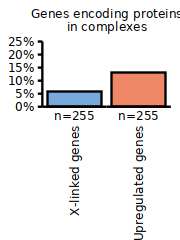

Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


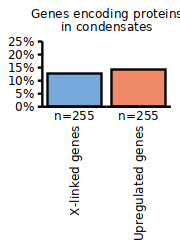

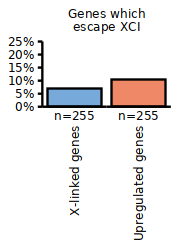

In [32]:
options(repr.plot.width=1.5, repr.plot.height=2)
complex_plot
condensate_plot
escapee_plot

In [33]:
make_pdf(complex_plot, "complex_plot", w=1, h=2)
make_pdf(condensate_plot, "condensate_plot", w=1, h=2)
make_pdf(escapee_plot, "escapee_plot", w=1, h=2)

Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


png 
  2

Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


png 
  2

Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


png 
  2

In [28]:
quantiles <- counts_melt %>% 
    filter(escapee==FALSE) %>%
    group_by(Well_cell_line) %>%
    summarize(quant10=quantile(TPM_total, probs=(0.1), na.rm=TRUE),
              quant90=quantile(TPM_total, probs=(0.9), na.rm=TRUE))

In [25]:
xcu_gene_expression <- counts_melt %>% 
    left_join(quantiles) %>%
    filter(TPM_total > quant10,
           TPM_total < quant90,
           Cell_type %in% c("XX"), 
           CDSCHROM=="chrX") %>%
    mutate(up_or_ref=case_when(GENEID %in% up_genes ~ "UP",
                               GENEID %in% ref_genes ~ "REF",
                               TRUE ~ "NOPE")) %>%
    filter(up_or_ref %in% c("UP", "REF")) %>%
    group_by(Well_cell_line, up_or_ref) %>%
    summarize(meanSum=mean(TPM_total, na.rm=TRUE))

xcu_gene_expression_plot <- ggplot(xcu_gene_expression, aes(x=up_or_ref, y=meanSum, fill=up_or_ref)) +
    geom_violin(draw_quantiles = c(0.5)) +
    ylim(0, NA) +
    ylab("Mean gene expression") +
    xlab(NULL) +
    scale_x_discrete(labels=c("n=255", "n=255")) +
    facet_wrap(~up_or_ref, strip.position="bottom", scales="free_x", labeller = labeller(up_or_ref=c(REF="X-linked genes", UP="Upregulated genes"))) +
    scale_fill_manual(values=c("#77AADB", "#ee8866")) +
        theme(panel.grid=element_blank(),
              panel.background=element_blank(),
              axis.title.y=element_text(color="black", size=7),
              axis.text.y=element_text(color="black", size=7),
              axis.text.x=element_text(color="black", size=7, margin=margin(t=0, b=0)),
              legend.title=element_text(size=7, hjust=0.5),
              axis.ticks=element_line(),
              axis.ticks.x=element_blank(),
              axis.line=element_line(),
              legend.text=element_text(size=7),
              legend.position="none",
              plot.title=element_text(size=7, hjust=0.5),
              strip.background = element_blank(),
              strip.placement = "outside",
              strip.text.x = element_text(color="black", angle=90, size=7, hjust=1, vjust=0.5, margin=margin(t=0)),
              panel.spacing = unit(0, "lines"))    

Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'Well_cell_line'. You can override using the `.groups` argument.
Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'Well_cell_line'. You can override using the `.groups` argument.


In [37]:
options(repr.plot.width=1, repr.plot.height=2)
make_pdf(xcu_gene_expression_plot, "xcu_gene_expression_plot", w=1, h=2)

png 
  2

In [33]:
t.test(x=xcu_gene_expression[which(xcu_gene_expression$up_or_ref=="REF"),]$meanSum, y=xcu_gene_expression[which(xcu_gene_expression$up_or_ref=="UP"),]$meanSum)


	Welch Two Sample t-test

data:  xcu_gene_expression[which(xcu_gene_expression$up_or_ref == "REF"), ]$meanSum and xcu_gene_expression[which(xcu_gene_expression$up_or_ref == "UP"), ]$meanSum
t = -3.1593, df = 131.12, p-value = 0.001964
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.618173 -0.372004
sample estimates:
mean of x mean of y 
 9.790949 10.786038 



	Welch Two Sample t-test

data:  xcu_gene_expression_no_sig[which(xcu_gene_expression_no_sig$up_or_ref == "REF"), ]$meanSum and xcu_gene_expression_no_sig[which(xcu_gene_expression_no_sig$up_or_ref == "UP"), ]$meanSum
t = 4.0069, df = 122.89, p-value = 0.0001059
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7706505 2.2754450
sample estimates:
mean of x mean of y 
10.990281  9.467234 


In [29]:
all_norm_melt <- counts_melt

In [30]:
del1_genes <- gene_metadata %>% 
    filter(GENESEQSTART > deletion_metadata[which(deletion_metadata$Deletion=="1"),]$chrX.Start,
           GENESEQEND < deletion_metadata[which(deletion_metadata$Deletion=="1"),]$chrX.End,
           CDSCHROM=="chrX") %>%
    .$GENEID %>%
    unique
del2_genes <- gene_metadata %>% 
    filter(GENESEQSTART > deletion_metadata[which(deletion_metadata$Deletion=="2"),]$chrX.Start,
           GENESEQEND < deletion_metadata[which(deletion_metadata$Deletion=="2"),]$chrX.End,
           CDSCHROM=="chrX") %>%
    .$GENEID %>%
    unique
del3_genes <- gene_metadata %>% 
    filter(GENESEQSTART > deletion_metadata[which(deletion_metadata$Deletion=="3"),]$chrX.Start,
           GENESEQEND < deletion_metadata[which(deletion_metadata$Deletion=="3"),]$chrX.End,
           CDSCHROM=="chrX") %>%
    .$GENEID %>%
    unique

In [ ]:
up_genes_in_deletions <- up_genes[up_genes %in% c(del1_genes, del2_genes, del3_genes)] 
up_gene_heatmap_data <- counts_melt %>%
    left_join(quantiles) %>%
    filter(GENEID %in% up_genes_in_deletions,
           Cell_type %in% c("XCastOMus", "XMusOCast", "XMusY", "Deletion 1", "Deletion 2", "Deletion 3"),
           TPM_total > quant10,
           TPM_total < quant90
          ) %>%
    mutate(in_del=case_when(GENEID %in% del1_genes ~ "Deletion 1",
                            GENEID %in% del2_genes ~ "Deletion 2",
                            GENEID %in% del3_genes ~ "Deletion 3")) %>%
    group_by(in_del, Cell_type) %>%
    summarize(meanCast=mean(TPM_cast, na.rm=TRUE),
              meanMus=mean(TPM_mus, na.rm=TRUE)) %>%
    select(in_del, meanCast, meanMus, Cell_type) %>% #, Well_cell_line) %>%
    left_join(
        select(
            summarize(
                group_by(
                    mutate(
                        filter(
                            left_join(counts_melt,
                                      quantiles),
                            GENEID %in% up_genes_in_deletions,
                            Cell_type=="XX",
                            TPM_total > quant10,
                            TPM_total < quant90
                        ),
                        in_del=case_when(GENEID %in% del1_genes ~ "Deletion 1",
                            GENEID %in% del2_genes ~ "Deletion 2",
                            GENEID %in% del3_genes ~ "Deletion 3")),
                    in_del, Cell_type),
                meanCastX=mean(TPM_cast, na.rm=TRUE),
                meanMusX=mean(TPM_mus, na.rm=TRUE),
                meanTotalX=mean(TPM_total, na.rm=TRUE)), 
            in_del, meanCastX, meanMusX)
    ) %>%
    mutate(castRatio=meanCast/meanCastX,
           musRatio=meanMus/meanMusX)

Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'in_del'. You can override using the `.groups` argument.
Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'in_del'. You can override using the `.groups` argument.
Joining, by = "in_del"


In [31]:
up_genes_in_deletions <- up_genes[up_genes %in% c(del1_genes, del2_genes, del3_genes)] 
up_gene_heatmap_data <- counts_melt %>%
    left_join(quantiles) %>%
    filter(GENEID %in% up_genes_in_deletions,
           Cell_type %in% c("XCastOMus", "XMusOCast", "XMusY", "Deletion 1", "Deletion 2", "Deletion 3"),
           TPM_total > quant10,
           TPM_total < quant90
          ) %>%
    group_by(GENEID, SYMBOL, Cell_type, GENESEQSTART) %>%
    summarize(meanCast=mean(TPM_cast, na.rm=TRUE),
              meanMus=mean(TPM_mus, na.rm=TRUE)) %>%
    select(GENEID, SYMBOL, GENESEQSTART, Cell_type, meanCast, meanMus) %>%
    left_join(
        select(
            summarize(
                group_by(
                        filter(
                            left_join(counts_melt,
                                      quantiles),
                            GENEID %in% up_genes_in_deletions,
                            Cell_type=="XX",
                            TPM_total > quant10,
                            TPM_total < quant90
                        ),
                    GENEID, Cell_type),
                meanCastX=mean(TPM_cast, na.rm=TRUE),
                meanMusX=mean(TPM_mus, na.rm=TRUE),
                meanTotalX=mean(TPM_total, na.rm=TRUE)), 
            GENEID, meanCastX, meanMusX, meanTotalX)
    ) %>%
    mutate(castRatio=meanCast/meanCastX,
           musRatio=meanMus/meanMusX,
           castRatio_total=meanCast/(meanTotalX/2),
           musRatio_total=meanMus/(meanTotalX/2))

Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'GENEID', 'SYMBOL', 'Cell_type'. You can override using the `.groups` argument.
Joining, by = "Well_cell_line"
`summarise()` has grouped output by 'GENEID'. You can override using the `.groups` argument.
Joining, by = "GENEID"


In [32]:
i <- 0
for(gene in unique(arrange(up_gene_heatmap_data, GENESEQSTART)$GENEID)){
        up_gene_heatmap_data[which(up_gene_heatmap_data$GENEID == gene),"gene_pos"] <- i
        i <- i+1
}

In [33]:
j <- 0
for(cell_type in c("XCastOMus", "Deletion 1", "Deletion 2", "XMusOCast", "XMusY", "Deletion 3")){
    up_gene_heatmap_data[which(up_gene_heatmap_data$Cell_type == cell_type), "cell_pos"] <- j
    j <- j+1
}

png 
  2

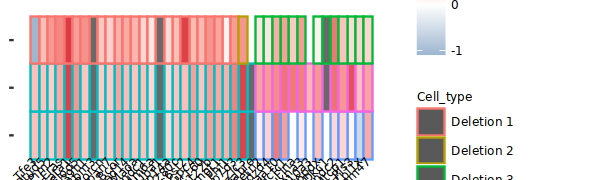

In [36]:
temp_xcastomus <- up_gene_heatmap_data %>% filter(Cell_type=="XCastOMus", GENEID %in% c(del1_genes, del2_genes)) %>% rename(ratio_total=castRatio_total)
temp_1 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 1", GENEID %in% c(del1_genes)) %>% mutate(cell_pos=2) %>% rename(ratio_total=castRatio_total)
temp_2 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 2", GENEID %in% c(del2_genes)) %>% mutate(cell_pos=2) %>% rename(ratio_total=castRatio_total)
temp_xmusocast <- up_gene_heatmap_data %>% filter(Cell_type=="XMusOCast", GENEID %in% c(del3_genes)) %>% mutate(cell_pos=0) %>% rename(ratio_total=musRatio_total)
temp_xy <- up_gene_heatmap_data %>% filter(Cell_type=="XMusY", GENEID %in% c(del3_genes)) %>% mutate(cell_pos=1) %>% rename(ratio_total=musRatio_total)
temp_3 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 3", GENEID %in% c(del3_genes)) %>% mutate(cell_pos=2) %>% rename(ratio_total=musRatio_total)

test_temp <- rbind(temp_xcastomus, mutate(temp_xcastomus, cell_pos=1), temp_1, temp_2, temp_xmusocast, temp_xy, temp_3)
#test_temp_cast <- rbind(temp_xcastomus, temp_1, temp_2)
#test_temp_mus <- rbind(temp_xmusocast, temp_xy, temp_3)

options(repr.plot.width=5, repr.plot.height=1.5)
test_plot <- ggplot(test_temp, aes(ymin=cell_pos-0.5, ymax=cell_pos+0.5, xmin=gene_pos-0.5, xmax=gene_pos+0.5, fill=log2(ratio_total), color=Cell_type)) +
    geom_rect() +
    scale_fill_gradient2(low = "#427ca8", mid="white", high="#db3b46", name="log2(XCast/(XCast+XMus)/2)", na.value = "#696969") +
    geom_text(data=unique(test_temp[,c("SYMBOL", "gene_pos")]), aes(y=-0.5, x=gene_pos, label=SYMBOL), inherit.aes=FALSE, hjust=1, size=7*0.352777778, angle=45) +
    coord_cartesian(clip = "off") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.title.y=element_blank(),
          axis.text.y=element_blank(),
          legend.title=element_text(size=7),
          legend.text=element_text(size=7),
          axis.title.x=element_blank())

test_plot
make_pdf(test_plot, "test_plot", w=5, h=1.5)

In [ ]:
x <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type=="XX") %>% mutate(del_XX="XX")
meanX <- x %>% group_by(GENEID) %>% summarize(meanX=mean(TPM_total))
del1 <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("Deletion 1")) %>% rename(allele=TPM_cast) %>% select(-TPM_mus) %>% mutate(del_XX="del")
del2 <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("Deletion 2")) %>% rename(allele=TPM_cast) %>% select(-TPM_mus) %>% mutate(del_XX="del")
del3 <- counts_melt %>% filter(CDSCHROM=="chrX", Cell_type %in% c("Deletion 3")) %>% rename(allele=TPM_mus) %>% select(-TPM_cast) %>% mutate(del_XX="del")
mean_del1 <- del1 %>% group_by(GENEID) %>% summarize(mean_del1=mean(allele))
mean_del2 <- del2 %>% group_by(GENEID) %>% summarize(mean_del2=mean(allele))
mean_del3 <- del3 %>% group_by(GENEID) %>% summarize(mean_del3=mean(allele))

In [ ]:
out_del <- list()
error_list <- list()
i <- 1
for(del in list(del1, del2, del3)){
    test <- rbind(mutate(select(x, -TPM_cast, -TPM_mus), allele=TPM_total), del)
    if(i==1){
        gene_list <- del1_genes
    } else if(i==2){
        gene_list <- del2_genes
    } else if(i==3){
        gene_list <- del3_genes
    }
    out_del[[i]] <- list()
    for(gene in gene_list){
            out_del[[i]][[gene]] <- c(p.val=tryCatch(t.test(x=test[which(test$GENEID==gene & test$del_XX=="del"),]$allele,
                                                        y=test[which(test$GENEID==gene & test$del_XX=="XX"),]$allele*0.5,
                                                        alternative="greater",
                                                        exact=FALSE)$p.val,
                                            error=function(cond){1}),
                             del_mean=as.double(mean(test[which(test$GENEID==gene & test$del_XX=="del"),]$allele, na.rm=TRUE)),
                             xx_mean=as.double(mean(test[which(test$GENEID==gene & test$del_XX=="XX"),]$allele, na.rm=TRUE)*0.5))
    }
    i <- i+1
}

In [ ]:
del1_up_gene_data <- out_del[[1]] %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(del_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

del2_up_gene_data <- out_del[[2]] %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(del_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

del3_up_gene_data <- out_del[[3]] %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(del_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

In [ ]:
cutoff_1.2_del1 <- del1_up_gene_data %>% filter(xx_mean>0, del_mean>0, logfc>log2(1.2), p.val<0.05) %>% rownames() 
cutoff_1.2_del2 <- del2_up_gene_data %>% filter(xx_mean>0, del_mean>0, logfc>log2(1.2), p.val<0.05) %>% rownames() 
cutoff_1.2_del3 <- del3_up_gene_data %>% filter(xx_mean>0, del_mean>0, logfc>log2(1.2), p.val<0.05) %>% rownames() 
del_gene_list <- list("Deletion 1"=cutoff_1.2_del1,
                      "Deletion 2"=cutoff_1.2_del2,
                      "Deletion 3"=cutoff_1.2_del3)

In [ ]:
up_genes_in_deletions <- c(del_gene_list[[1]], del_gene_list[[2]], del_gene_list[[3]])
up_gene_heatmap_data <- counts_melt %>%
    left_join(quantiles) %>%
    filter(GENEID %in% up_genes_in_deletions,
            Cell_type %in% c("XCastOMus", "XMusOCast", "XMusY", "Deletion 1", "Deletion 2", "Deletion 3"),
            TPM_total > quant10,
            TPM_total < quant90
            ) %>%
    group_by(GENEID, SYMBOL, Cell_type, GENESEQSTART) %>%
    summarize(meanCast=mean(TPM_cast, na.rm=TRUE),
                meanMus=mean(TPM_mus, na.rm=TRUE)) %>%
    select(GENEID, SYMBOL, GENESEQSTART, Cell_type, meanCast, meanMus) %>%
    left_join(
        select(
            summarize(
                group_by(
                        filter(
                            left_join(counts_melt,
                                        quantiles),
                            GENEID %in% up_genes_in_deletions,
                            Cell_type=="XX",
                            TPM_total > quant10,
                            TPM_total < quant90
                        ),
                    GENEID, Cell_type),
                meanCastX=mean(TPM_cast, na.rm=TRUE),
                meanMusX=mean(TPM_mus, na.rm=TRUE),
                meanTotalX=mean(TPM_total, na.rm=TRUE)), 
            GENEID, meanCastX, meanMusX, meanTotalX)
    ) %>%
    mutate(castRatio=meanCast/meanCastX,
            musRatio=meanMus/meanMusX,
            castRatio_total=meanCast/(meanTotalX/2),
            musRatio_total=meanMus/(meanTotalX/2))
k <- 0
for(gene in unique(arrange(up_gene_heatmap_data, GENESEQSTART)$GENEID)){
    up_gene_heatmap_data[which(up_gene_heatmap_data$GENEID == gene),"gene_pos"] <- k
    k <- k+1
}
j <- 0
for(cell_type in c("XCastOMus", "Deletion 1", "Deletion 2", "XMusOCast", "XMusY", "Deletion 3")){
    up_gene_heatmap_data[which(up_gene_heatmap_data$Cell_type == cell_type), "cell_pos"] <- j
    j <- j+1
}

temp_xcastomus <- up_gene_heatmap_data %>% filter(Cell_type=="XCastOMus", GENEID %in% c(del_gene_list[[1]], del_gene_list[[2]])) %>% rename(ratio_total=castRatio_total)
temp_1 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 1", GENEID %in% c(del_gene_list[[1]])) %>% mutate(cell_pos=2) %>% rename(ratio_total=castRatio_total)
temp_2 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 2", GENEID %in% c(del_gene_list[[2]])) %>% mutate(cell_pos=2) %>% rename(ratio_total=castRatio_total)
temp_xmusocast <- up_gene_heatmap_data %>% filter(Cell_type=="XMusOCast", GENEID %in% c(del_gene_list[[3]])) %>% mutate(cell_pos=0) %>% rename(ratio_total=musRatio_total)
temp_xy <- up_gene_heatmap_data %>% filter(Cell_type=="XMusY", GENEID %in% c(del_gene_list[[3]])) %>% mutate(cell_pos=1) %>% rename(ratio_total=musRatio_total)
temp_3 <- up_gene_heatmap_data %>% filter(Cell_type=="Deletion 3", GENEID %in% c(del_gene_list[[3]])) %>% mutate(cell_pos=2) %>% rename(ratio_total=musRatio_total)

test_temp <- rbind(temp_xcastomus, mutate(temp_xcastomus, cell_pos=1), temp_1, temp_2, temp_xmusocast, temp_xy, temp_3)
test_temp <- test_temp %>% filter(!GENEID %in% unique(filter(test_temp, is.na(ratio_total))$GENEID))
#test_temp_cast <- rbind(temp_xcastomus, temp_1, temp_2)
#test_temp_mus <- rbind(temp_xmusocast, temp_xy, temp_3)

options(repr.plot.width=5, repr.plot.height=1.5)
del_in_xo_plot <- ggplot(test_temp, aes(ymin=cell_pos-0.5, ymax=cell_pos+0.5, xmin=gene_pos-0.5, xmax=gene_pos+0.5, fill=log2(ratio_total), color=Cell_type)) +
    geom_rect() +
    scale_fill_gradient2(low = "#427ca8", mid="white", high="#db3b46", name="log2(XCast/(XCast+XMus)/2)", na.value = "#696969") +
    geom_text(data=unique(test_temp[,c("SYMBOL", "gene_pos")]), aes(y=-0.5, x=gene_pos, label=SYMBOL), inherit.aes=FALSE, hjust=1, size=7*0.352777778, angle=45) +
    coord_cartesian(clip = "off") +
    theme(panel.grid=element_blank(),
            panel.background=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank(),
            axis.title.y=element_blank(),
            axis.text.y=element_blank(),
            legend.title=element_text(size=7),
            legend.text=element_text(size=7),
            axis.title.x=element_blank())

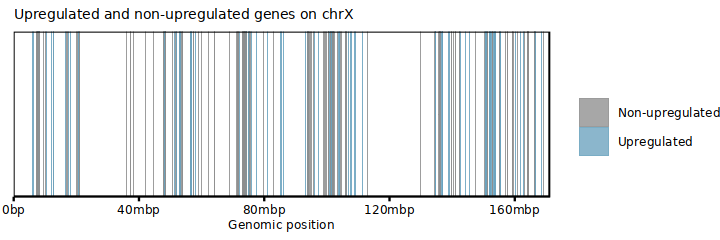

In [60]:
up_ref_genes <- gene_metadata %>% 
    filter(CDSCHROM=="chrX") %>%
    mutate(up_or_ref=case_when(GENEID %in% up_genes ~ "UP",
                               GENEID %in% ref_genes ~ "REF",
                               TRUE ~ "NOPE")) %>%
    filter(up_or_ref %in% c("UP", "REF"))

up_ref_gene_plot <- ggplot(up_ref_genes, aes(x=GENESEQSTART, y=0.5, fill=up_or_ref, color=up_or_ref)) +
    geom_bar(stat="identity", alpha=0.75, position="fill", linewidth=0.1) +
    scale_fill_manual(values=c("#8e8e8e", "#69a2bf"), labels=c("Non-upregulated", "Upregulated"), name="") +
    scale_color_manual(values=c("#8e8e8e", "#69a2bf"), labels=c("Non-upregulated", "Upregulated"), name="") +
    xlab("Genomic position") +
    ggtitle("Upregulated and non-upregulated genes on chrX") +
    coord_cartesian(xlim = c(0, 171031299), expand=FALSE) +
    scale_x_continuous(breaks=c(0, 4e7, 8e7, 1.2e8, 1.6e8), labels=c("0bp", "40mbp", "80mbp", "120mbp", "160mbp")) +
    theme(panel.background=element_blank(),
          panel.grid=element_blank(),
          panel.border=element_rect(fill="transparent", color="black"),
          axis.text.y=element_blank(),
          axis.title.x=element_text(size=7),
          axis.text.x=element_text(size=7, color="black"),
          axis.ticks=element_line(color="black"),
          axis.ticks.y=element_blank(),
          axis.title.y=element_blank(),
          plot.title=element_text(size=8),
          legend.text=element_text(size=7),
          legend.margin=margin(t = 0, r = 0, b = 0, l = 0.1, unit="in"))
          #legend.position="none")

options(repr.plot.width=6, repr.plot.height=2)
up_ref_gene_plot

In [61]:
make_pdf(up_ref_gene_plot, "up_ref_gene_plot", w=6, h=2)

png 
  2

In [57]:
xcom_pval <- list()
xmoc_pval <- list()
xy_pval <- list()
for(gene in gene_metadata[which(gene_metadata$CDSCHROM=="chrX"),]$GENEID){
    xcom_pval[[gene]] <- c(p.val=tryCatch(t.test(x=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XCastOMus"),]$TPM_cast,
                                                y=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total*0.5,
                                                exact=FALSE)$p.val,
                                    error=function(cond){1}),
                           xcom_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XCastOMus"),]$TPM_cast)),
                           xx_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total)*0.5))
    
    xmoc_pval[[gene]] <- c(p.val=tryCatch(t.test(x=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XMusOCast"),]$TPM_mus,
                                                y=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total*0.5,
                                                exact=FALSE)$p.val,
                            error=function(cond){1}),
                           xmoc_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XMusOCast"),]$TPM_mus)),
                           xx_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total)*0.5))
    
    xy_pval[[gene]] <- c(p.val=tryCatch(t.test(x=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XMusY"),]$TPM_mus,
                                                y=counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total*0.5,
                                                exact=FALSE)$p.val,
                            error=function(cond){1}),
                         xy_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XMusY"),]$TPM_mus)),
                           xx_mean=as.double(mean(counts_melt[which(counts_melt$GENEID==gene & counts_melt$Cell_type=="XX"),]$TPM_total)*0.5))
    
}

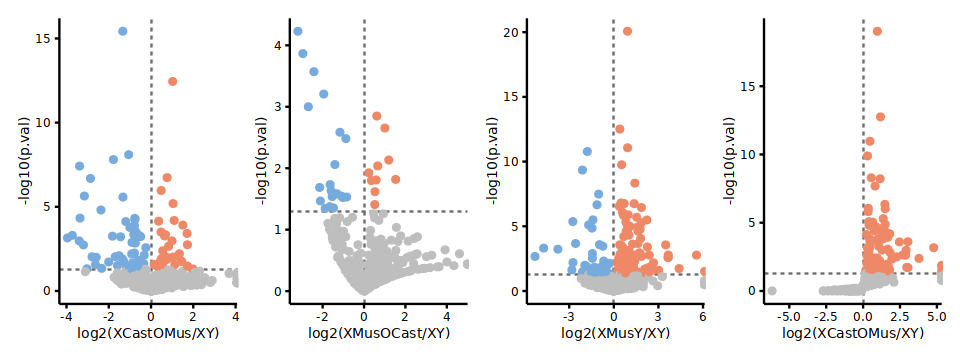

In [161]:
options(repr.plot.width=8, repr.plot.height=3)
xcom_data <- xcom_pval %>% 
    as.data.frame() %>% 
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(xcom_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 logfc<0 & p.val < 0.05 ~ "blue",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)
xmoc_data <- xmoc_pval %>% 
    as.data.frame() %>% 
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(xmoc_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 logfc<0 & p.val < 0.05 ~ "blue",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)
xy_data <- xy_pval %>% 
    as.data.frame() %>% 
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(xy_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 logfc<0 & p.val < 0.05 ~ "blue",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

xo_xy_data <- out %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    mutate(logfc=log2(xo_xy_mean/xx_mean)) %>%
    mutate(point_color=case_when(logfc>0 & p.val < 0.05 ~ "red",
                                 TRUE ~ "grey")) %>%
    filter(!is.nan(logfc), logfc!=-Inf)

xo_xy_plot <- ggplot(xo_xy_data, aes(y=-log10(p.val), x=logfc, color=point_color)) +
    scale_color_manual(values=c("grey", myPalette$red)) +
    geom_vline(xintercept=0, linetype=2, color="#696969") +
    geom_hline(yintercept=-log10(0.05), linetype=2, color="#696969") +
    geom_point() +
    xlab("log2(XCastOMus/XY)") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.title=element_text(size=8, color="black"),
          axis.ticks=element_line(color="black"),
          axis.text=element_text(size=7, color="black"),
          axis.line=element_line(color="black"))

xcom_plot <- ggplot(xcom_data, aes(y=-log10(p.val), x=logfc, color=point_color)) +
    scale_color_manual(values=c(myPalette$blue, "grey", myPalette$red)) +
    geom_vline(xintercept=0, linetype=2, color="#696969") +
    geom_hline(yintercept=-log10(0.05), linetype=2, color="#696969") +
    geom_point() +
    xlab("log2(XCastOMus/XY)") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.title=element_text(size=8, color="black"),
          axis.ticks=element_line(color="black"),
          axis.text=element_text(size=7, color="black"),
          axis.line=element_line(color="black"))

                                  

xmoc_plot <- ggplot(xmoc_data, aes(y=-log10(p.val), x=logfc, color=point_color)) +
    scale_color_manual(values=c(myPalette$blue, "grey", myPalette$red)) +
    geom_vline(xintercept=0, linetype=2, color="#696969") +
    geom_hline(yintercept=-log10(0.05), linetype=2, color="#696969") +
    geom_point() +
    xlab("log2(XMusOCast/XY)") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.title=element_text(size=8, color="black"),
          axis.ticks=element_line(color="black"),
          axis.text=element_text(size=7, color="black"),
          axis.line=element_line(color="black"))
                                  


xy_plot <- ggplot(xy_data, aes(y=-log10(p.val), x=logfc, color=point_color)) +
    scale_color_manual(values=c(myPalette$blue, "grey", myPalette$red)) +
    geom_vline(xintercept=0, linetype=2, color="#696969") +
    geom_hline(yintercept=-log10(0.05), linetype=2, color="#696969") +
    geom_point() +
    xlab("log2(XMusY/XY)") +
    theme(panel.grid=element_blank(),
          panel.background=element_blank(),
          axis.title=element_text(size=8, color="black"),
          axis.ticks=element_line(color="black"),
          axis.text=element_text(size=7, color="black"),
          axis.line=element_line(color="black"))
                                  
xcom_plot + theme(legend.position="none") | xmoc_plot + theme(legend.position="none") | xy_plot + theme(legend.position="none") | xo_xy_plot + theme(legend.position="none")

In [164]:
xo_xy_data$point_color %>% table()
xcom_data$point_color %>% table()
xmoc_data$point_color %>% table()
xy_data$point_color %>% table()

.
grey  red 
 345  112 

.
blue grey  red 
  55  348   36 

.
blue grey  red 
  20  324   10 

.
blue grey  red 
  37  324   95 

In [163]:
extdatafig1abc <- xcom_plot + theme(legend.position="none") | xmoc_plot + theme(legend.position="none") | xy_plot + theme(legend.position="none") | xo_xy_plot + theme(legend.position="none")
make_pdf(extdatafig1abc, "extdatafig1abc", w=8, h=3)

png 
  2

In [ ]:
del1_genes %>% length
del1_up_gene_data %>% filter(del_mean > 0, xx_mean > 0) %>% nrow
del1_up_gene_data %>% filter(del_mean > 0, xx_mean > 0, logfc>log2(1.2)) %>% nrow

cutoff_1.2_del1 %>% length

del2_genes %>% length
del2_up_gene_data %>% filter(del_mean > 0, xx_mean > 0) %>% nrow
cutoff_1.2_del2 %>% length

del3_genes %>% length
del3_up_gene_data %>% filter(del_mean > 0, xx_mean > 0) %>% nrow
cutoff_1.2_del3 %>% length

In [ ]:
metadata <- data.frame(seq_id=c("I21.1615.01", # A, A
                                "I21.1615.02", # A, A
                                "I21.1615.03", # B1ver1, B
                                "I21.1615.04", # B1ver2, AB
                                "I21.1615.05", # B2, C
                                "I21.1615.06", # B2, C
                                "I21.1615.07", # B3, D
                                "I21.1615.08", # B3, D
                                "I21.1615.23", # B3XIC, D-XIC
                                "I21.1615.09", # BusR2, F
                                "I21.1615.10", # BusR2, F
                                "I21.1615.11", # C, G
                                "I21.1615.12", # C, G
                                "I21.1615.13", # Reg1, H
                                "I21.1615.14", # Reg1, H
                                "I21.1615.15", # Reg2, I
                                "I21.1615.16", # Reg2, I
                                "I21.1615.17", # Reg3, J
                                "I21.1615.18", # Reg3, J
                                "I21.1615.19", # Reg4, K
                                "I21.1615.20", # Reg4, K
                                "I21.1615.21", # Reg2.4, I-TEL
                                "I21.1615.22", # Reg2.4, I-TEL
                                "I21.1529.01", # XX, XX
                                "I21.1529.02", # XX, XX
                                "I21.1529.05", # Rnf12, Rnf12
                                "I21.1529.06", # Rnf12, Rnf12
                                "I21.1529.21", # B4, E
                                "I21.1529.23", # B4, E
                                "I23.1325.01", # XCastOMus, XCastOMus
                                "I23.1325.02", # XCastOMus, XCastOMus
                                "I23.1325.03", # XMusOCast, XMusOCast
                                "I23.1325.04"  # XMusOCast, XMusOCast
                               ),
                       old_names=c("A","A","B1ver1","B1ver2","B2","B2","B3","B3","B3XIC","BusR2","BusR2","C","C","Reg1","Reg1","Reg2","Reg2","Reg3","Reg3","Reg4","Reg4","Reg2.4","Reg2.4","XX","XX","Rnf12","Rnf12","B4","B4","XCastOMus","XCastOMus","XMusOCast","XMusOCast"),
                       Deletion=c("A","A","B","AB","C","C","D","D","D-XIC","F","F","G","G","H","H","I","I","J","J","K","K","I-TEL","I-TEL","XX","XX","Rnf12","Rnf12","E","E","XCastOMus","XCastOMus","XMusOCast","XMusOCast"),
                       rep=c(1,2,1,1,1,2,1,2,1,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2)) %>%
    mutate(sample=paste0(Deletion, "_", rep))

In [ ]:
bulk_tpm <- read.table(file = "/staging/leuven/stg_00041/Ryan/RA004_XHetDel/beatrice_data/TPMs.nonallelic.txt", header=TRUE, sep="\t")

In [ ]:
colnames(bulk_tpm)[gsub("\\.merged", "", colnames(bulk_tpm)) %in% metadata$seq_id] <- as.data.frame(colnames(bulk_tpm)[gsub("\\.merged", "", colnames(bulk_tpm)) %in% metadata$seq_id]) %>% rename("seq_id"=1) %>% 
    mutate(seq_id=gsub(".merged", "", .$seq_id)) %>%
    left_join(metadata[,c("seq_id", "sample")]) %>%
    .$sample

In [ ]:
bulkXX <- bulk_tpm %>% select(Geneid, Chr, Start, End, XX_1, XX_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delA <- bulk_tpm %>% select(Geneid, Chr, Start, End, A_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delB <- bulk_tpm %>% select(Geneid, Chr, Start, End, B_1) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delAB <- bulk_tpm %>% select(Geneid, Chr, Start, End, AB_1) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delC <- bulk_tpm %>% select(Geneid, Chr, Start, End, C_1, C_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delD <- bulk_tpm %>% select(Geneid, Chr, Start, End, D_1, D_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delD_XIC <- bulk_tpm %>% select(Geneid, Chr, Start, End, `D-XIC_1`) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delE <- bulk_tpm %>% select(Geneid, Chr, Start, End, E_1, E_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delF <- bulk_tpm %>% select(Geneid, Chr, Start, End, F_1, F_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delG <- bulk_tpm %>% select(Geneid, Chr, Start, End, G_1) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delH <- bulk_tpm %>% select(Geneid, Chr, Start, End, H_1, H_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delI <- bulk_tpm %>% select(Geneid, Chr, Start, End, I_1, I_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delJ <- bulk_tpm %>% select(Geneid, Chr, Start, End, J_1, J_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delK <- bulk_tpm %>% select(Geneid, Chr, Start, End, K_1, K_2) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"))
delI_TEL <- bulk_tpm %>% select(Geneid, Chr, Start, End, `I-TEL_1`, `I-TEL_2`) %>% filter(Chr=="X") %>% melt(id.vars=c("Geneid", "Chr", "Start", "End")) %>% separate(variable, into=c("sample", "rep"), sep="_")

In [ ]:
bulk_del_gene_list <- list(
    "delA_genes" = delA_genes,
    "delB_genes" = delB_genes,
    "delAB_genes" = delAB_genes,
    "delC_genes" = delC_genes,
    "delD_genes" = delD_genes,
    "delD_XIC_genes" = delD_XIC_genes,
    "delE_genes" = delE_genes,
    "delF_genes" = delF_genes,
    "delG_genes" = delG_genes,
    "delH_genes" = delH_genes,
    "delI_genes" = delI_genes,
    "delJ_genes" = delJ_genes,
    "delK_genes" = delK_genes,
    "delI_TEL_genes" = delI_TEL_genes)

In [ ]:
bulk_out_del <- list()
i <- 1
for(del in list(delA, delB, delAB, delC, delD, delD_XIC, delE, delF, delG, delH, delI, delJ, delK, delI_TEL)){
    test <- rbind(bulkXX, del)
    gene_list <- bulk_del_gene_list[[i]]
    bulk_out_del[[i]] <- test %>%
        group_by(Geneid, sample) %>%
        summarize(meanVal=mean(value)) %>%
        dcast(Geneid ~ sample) %>%
        mutate(fc=.[[2]]/.[[3]])
    i <- i+1
}

In [ ]:
bulk_del_up_data <- data.frame(matrix(nrow=3, ncol=length(bulk_del_gene_list)))
rownames(bulk_del_up_data) <- c("genes in del", "exp genes in del", "up genes in del")
colnames(bulk_del_up_data) <- gsub("_genes", "", names(bulk_del_gene_list))
bulk_del_up_data     

In [ ]:
for(i in 1:14){
    bulk_del_up_data[1, i] <- length(bulk_del_gene_list[[i]])
    bulk_del_up_data[2, i] <- nrow(filter(bulk_out_del[[i]], Geneid %in% bulk_del_gene_list[[i]], bulk_out_del[[i]][[2]] > 0, bulk_out_del[[i]][[3]] > 0))
    bulk_del_up_data[3, i] <- nrow(filter(bulk_out_del[[i]], Geneid %in% bulk_del_gene_list[[i]], bulk_out_del[[i]][[2]] > 0, bulk_out_del[[i]][[3]] > 0, fc>0.6))
}
bulk_del_up_data